# Person Box Distribution

In [4]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
import random
from sklearn.cluster import KMeans

In [5]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [6]:
def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname

In [30]:
# Max Height of [60-70]

src = glob.glob("./yolo-various-size/60-70/bdd100k_60_70_GT/*.txt")

max_height = 0
i=0
for path in src:
    contents = file_lines_to_list(path)
    for box in contents:
        height = int(box[4])-int(box[2])
        if height > max_height: max_height = height          
    i+=1
print(i, f"/ {len(src)}")    
print(max_height)

274 / 274
286


# Generate Fixed-size Person Annotations (for Custom YOLO)

In [31]:
# GENERATE TRAINING ANNOTATIONS

xml_src = glob.glob("../datasets/bdd100k/xml/train/*.xml")

text_file = open("./yolo-various-size/60-70-enhanced/bdd100k_person_60_70_enhanced_train.txt", "w+")       # 60-70 -> [50-80]

i=0
for xml_path in xml_src:
    i+=1
    person_boxes = []
    medium_widths = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append([left, top, right, bottom])

                # Fixed: [60-70] -> [50-80]
                if int(right)-int(left) >= 50 and int(right)-int(left) <= 80 and int(bottom)-int(top) <= 286:
                    medium_widths.append(int(right)-int(left))


    if len(person_boxes) > 0 and len(medium_widths) > 0:
        img_basename = os.path.basename(xml_path)
        img_onlyname = os.path.splitext(img_basename)[0]

        text_file.write('/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/60-70-enhanced/'+img_onlyname+'.jpg ')

        for box in person_boxes:
            if int(box[2])-int(box[0]) >= 50 and int(box[2])-int(box[0]) <= 80 and int(box[3])-int(box[1]) <= 286:
                text_file.write('{},{},{},{},{} '.format(box[0], box[1], box[2], box[3], 0))
        text_file.write('\n')
        
    print("Img", i)
text_file.close()

Img 1
Img 2
Img 3
Img 4
Img 5
Img 6
Img 7
Img 8
Img 9
Img 10
Img 11
Img 12
Img 13
Img 14
Img 15
Img 16
Img 17
Img 18
Img 19
Img 20
Img 21
Img 22
Img 23
Img 24
Img 25
Img 26
Img 27
Img 28
Img 29
Img 30
Img 31
Img 32
Img 33
Img 34
Img 35
Img 36
Img 37
Img 38
Img 39
Img 40
Img 41
Img 42
Img 43
Img 44
Img 45
Img 46
Img 47
Img 48
Img 49
Img 50
Img 51
Img 52
Img 53
Img 54
Img 55
Img 56
Img 57
Img 58
Img 59
Img 60
Img 61
Img 62
Img 63
Img 64
Img 65
Img 66
Img 67
Img 68
Img 69
Img 70
Img 71
Img 72
Img 73
Img 74
Img 75
Img 76
Img 77
Img 78
Img 79
Img 80
Img 81
Img 82
Img 83
Img 84
Img 85
Img 86
Img 87
Img 88
Img 89
Img 90
Img 91
Img 92
Img 93
Img 94
Img 95
Img 96
Img 97
Img 98
Img 99
Img 100
Img 101
Img 102
Img 103
Img 104
Img 105
Img 106
Img 107
Img 108
Img 109
Img 110
Img 111
Img 112
Img 113
Img 114
Img 115
Img 116
Img 117
Img 118
Img 119
Img 120
Img 121
Img 122
Img 123
Img 124
Img 125
Img 126
Img 127
Img 128
Img 129
Img 130
Img 131
Img 132
Img 133
Img 134
Img 135
Img 136
Img 137
Img 138
Img 

Img 1048
Img 1049
Img 1050
Img 1051
Img 1052
Img 1053
Img 1054
Img 1055
Img 1056
Img 1057
Img 1058
Img 1059
Img 1060
Img 1061
Img 1062
Img 1063
Img 1064
Img 1065
Img 1066
Img 1067
Img 1068
Img 1069
Img 1070
Img 1071
Img 1072
Img 1073
Img 1074
Img 1075
Img 1076
Img 1077
Img 1078
Img 1079
Img 1080
Img 1081
Img 1082
Img 1083
Img 1084
Img 1085
Img 1086
Img 1087
Img 1088
Img 1089
Img 1090
Img 1091
Img 1092
Img 1093
Img 1094
Img 1095
Img 1096
Img 1097
Img 1098
Img 1099
Img 1100
Img 1101
Img 1102
Img 1103
Img 1104
Img 1105
Img 1106
Img 1107
Img 1108
Img 1109
Img 1110
Img 1111
Img 1112
Img 1113
Img 1114
Img 1115
Img 1116
Img 1117
Img 1118
Img 1119
Img 1120
Img 1121
Img 1122
Img 1123
Img 1124
Img 1125
Img 1126
Img 1127
Img 1128
Img 1129
Img 1130
Img 1131
Img 1132
Img 1133
Img 1134
Img 1135
Img 1136
Img 1137
Img 1138
Img 1139
Img 1140
Img 1141
Img 1142
Img 1143
Img 1144
Img 1145
Img 1146
Img 1147
Img 1148
Img 1149
Img 1150
Img 1151
Img 1152
Img 1153
Img 1154
Img 1155
Img 1156
Img 1157
Img 1158
I

Img 1973
Img 1974
Img 1975
Img 1976
Img 1977
Img 1978
Img 1979
Img 1980
Img 1981
Img 1982
Img 1983
Img 1984
Img 1985
Img 1986
Img 1987
Img 1988
Img 1989
Img 1990
Img 1991
Img 1992
Img 1993
Img 1994
Img 1995
Img 1996
Img 1997
Img 1998
Img 1999
Img 2000
Img 2001
Img 2002
Img 2003
Img 2004
Img 2005
Img 2006
Img 2007
Img 2008
Img 2009
Img 2010
Img 2011
Img 2012
Img 2013
Img 2014
Img 2015
Img 2016
Img 2017
Img 2018
Img 2019
Img 2020
Img 2021
Img 2022
Img 2023
Img 2024
Img 2025
Img 2026
Img 2027
Img 2028
Img 2029
Img 2030
Img 2031
Img 2032
Img 2033
Img 2034
Img 2035
Img 2036
Img 2037
Img 2038
Img 2039
Img 2040
Img 2041
Img 2042
Img 2043
Img 2044
Img 2045
Img 2046
Img 2047
Img 2048
Img 2049
Img 2050
Img 2051
Img 2052
Img 2053
Img 2054
Img 2055
Img 2056
Img 2057
Img 2058
Img 2059
Img 2060
Img 2061
Img 2062
Img 2063
Img 2064
Img 2065
Img 2066
Img 2067
Img 2068
Img 2069
Img 2070
Img 2071
Img 2072
Img 2073
Img 2074
Img 2075
Img 2076
Img 2077
Img 2078
Img 2079
Img 2080
Img 2081
Img 2082
Img 2083
I

Img 2886
Img 2887
Img 2888
Img 2889
Img 2890
Img 2891
Img 2892
Img 2893
Img 2894
Img 2895
Img 2896
Img 2897
Img 2898
Img 2899
Img 2900
Img 2901
Img 2902
Img 2903
Img 2904
Img 2905
Img 2906
Img 2907
Img 2908
Img 2909
Img 2910
Img 2911
Img 2912
Img 2913
Img 2914
Img 2915
Img 2916
Img 2917
Img 2918
Img 2919
Img 2920
Img 2921
Img 2922
Img 2923
Img 2924
Img 2925
Img 2926
Img 2927
Img 2928
Img 2929
Img 2930
Img 2931
Img 2932
Img 2933
Img 2934
Img 2935
Img 2936
Img 2937
Img 2938
Img 2939
Img 2940
Img 2941
Img 2942
Img 2943
Img 2944
Img 2945
Img 2946
Img 2947
Img 2948
Img 2949
Img 2950
Img 2951
Img 2952
Img 2953
Img 2954
Img 2955
Img 2956
Img 2957
Img 2958
Img 2959
Img 2960
Img 2961
Img 2962
Img 2963
Img 2964
Img 2965
Img 2966
Img 2967
Img 2968
Img 2969
Img 2970
Img 2971
Img 2972
Img 2973
Img 2974
Img 2975
Img 2976
Img 2977
Img 2978
Img 2979
Img 2980
Img 2981
Img 2982
Img 2983
Img 2984
Img 2985
Img 2986
Img 2987
Img 2988
Img 2989
Img 2990
Img 2991
Img 2992
Img 2993
Img 2994
Img 2995
Img 2996
I

Img 3815
Img 3816
Img 3817
Img 3818
Img 3819
Img 3820
Img 3821
Img 3822
Img 3823
Img 3824
Img 3825
Img 3826
Img 3827
Img 3828
Img 3829
Img 3830
Img 3831
Img 3832
Img 3833
Img 3834
Img 3835
Img 3836
Img 3837
Img 3838
Img 3839
Img 3840
Img 3841
Img 3842
Img 3843
Img 3844
Img 3845
Img 3846
Img 3847
Img 3848
Img 3849
Img 3850
Img 3851
Img 3852
Img 3853
Img 3854
Img 3855
Img 3856
Img 3857
Img 3858
Img 3859
Img 3860
Img 3861
Img 3862
Img 3863
Img 3864
Img 3865
Img 3866
Img 3867
Img 3868
Img 3869
Img 3870
Img 3871
Img 3872
Img 3873
Img 3874
Img 3875
Img 3876
Img 3877
Img 3878
Img 3879
Img 3880
Img 3881
Img 3882
Img 3883
Img 3884
Img 3885
Img 3886
Img 3887
Img 3888
Img 3889
Img 3890
Img 3891
Img 3892
Img 3893
Img 3894
Img 3895
Img 3896
Img 3897
Img 3898
Img 3899
Img 3900
Img 3901
Img 3902
Img 3903
Img 3904
Img 3905
Img 3906
Img 3907
Img 3908
Img 3909
Img 3910
Img 3911
Img 3912
Img 3913
Img 3914
Img 3915
Img 3916
Img 3917
Img 3918
Img 3919
Img 3920
Img 3921
Img 3922
Img 3923
Img 3924
Img 3925
I

Img 4732
Img 4733
Img 4734
Img 4735
Img 4736
Img 4737
Img 4738
Img 4739
Img 4740
Img 4741
Img 4742
Img 4743
Img 4744
Img 4745
Img 4746
Img 4747
Img 4748
Img 4749
Img 4750
Img 4751
Img 4752
Img 4753
Img 4754
Img 4755
Img 4756
Img 4757
Img 4758
Img 4759
Img 4760
Img 4761
Img 4762
Img 4763
Img 4764
Img 4765
Img 4766
Img 4767
Img 4768
Img 4769
Img 4770
Img 4771
Img 4772
Img 4773
Img 4774
Img 4775
Img 4776
Img 4777
Img 4778
Img 4779
Img 4780
Img 4781
Img 4782
Img 4783
Img 4784
Img 4785
Img 4786
Img 4787
Img 4788
Img 4789
Img 4790
Img 4791
Img 4792
Img 4793
Img 4794
Img 4795
Img 4796
Img 4797
Img 4798
Img 4799
Img 4800
Img 4801
Img 4802
Img 4803
Img 4804
Img 4805
Img 4806
Img 4807
Img 4808
Img 4809
Img 4810
Img 4811
Img 4812
Img 4813
Img 4814
Img 4815
Img 4816
Img 4817
Img 4818
Img 4819
Img 4820
Img 4821
Img 4822
Img 4823
Img 4824
Img 4825
Img 4826
Img 4827
Img 4828
Img 4829
Img 4830
Img 4831
Img 4832
Img 4833
Img 4834
Img 4835
Img 4836
Img 4837
Img 4838
Img 4839
Img 4840
Img 4841
Img 4842
I

Img 5651
Img 5652
Img 5653
Img 5654
Img 5655
Img 5656
Img 5657
Img 5658
Img 5659
Img 5660
Img 5661
Img 5662
Img 5663
Img 5664
Img 5665
Img 5666
Img 5667
Img 5668
Img 5669
Img 5670
Img 5671
Img 5672
Img 5673
Img 5674
Img 5675
Img 5676
Img 5677
Img 5678
Img 5679
Img 5680
Img 5681
Img 5682
Img 5683
Img 5684
Img 5685
Img 5686
Img 5687
Img 5688
Img 5689
Img 5690
Img 5691
Img 5692
Img 5693
Img 5694
Img 5695
Img 5696
Img 5697
Img 5698
Img 5699
Img 5700
Img 5701
Img 5702
Img 5703
Img 5704
Img 5705
Img 5706
Img 5707
Img 5708
Img 5709
Img 5710
Img 5711
Img 5712
Img 5713
Img 5714
Img 5715
Img 5716
Img 5717
Img 5718
Img 5719
Img 5720
Img 5721
Img 5722
Img 5723
Img 5724
Img 5725
Img 5726
Img 5727
Img 5728
Img 5729
Img 5730
Img 5731
Img 5732
Img 5733
Img 5734
Img 5735
Img 5736
Img 5737
Img 5738
Img 5739
Img 5740
Img 5741
Img 5742
Img 5743
Img 5744
Img 5745
Img 5746
Img 5747
Img 5748
Img 5749
Img 5750
Img 5751
Img 5752
Img 5753
Img 5754
Img 5755
Img 5756
Img 5757
Img 5758
Img 5759
Img 5760
Img 5761
I

Img 6576
Img 6577
Img 6578
Img 6579
Img 6580
Img 6581
Img 6582
Img 6583
Img 6584
Img 6585
Img 6586
Img 6587
Img 6588
Img 6589
Img 6590
Img 6591
Img 6592
Img 6593
Img 6594
Img 6595
Img 6596
Img 6597
Img 6598
Img 6599
Img 6600
Img 6601
Img 6602
Img 6603
Img 6604
Img 6605
Img 6606
Img 6607
Img 6608
Img 6609
Img 6610
Img 6611
Img 6612
Img 6613
Img 6614
Img 6615
Img 6616
Img 6617
Img 6618
Img 6619
Img 6620
Img 6621
Img 6622
Img 6623
Img 6624
Img 6625
Img 6626
Img 6627
Img 6628
Img 6629
Img 6630
Img 6631
Img 6632
Img 6633
Img 6634
Img 6635
Img 6636
Img 6637
Img 6638
Img 6639
Img 6640
Img 6641
Img 6642
Img 6643
Img 6644
Img 6645
Img 6646
Img 6647
Img 6648
Img 6649
Img 6650
Img 6651
Img 6652
Img 6653
Img 6654
Img 6655
Img 6656
Img 6657
Img 6658
Img 6659
Img 6660
Img 6661
Img 6662
Img 6663
Img 6664
Img 6665
Img 6666
Img 6667
Img 6668
Img 6669
Img 6670
Img 6671
Img 6672
Img 6673
Img 6674
Img 6675
Img 6676
Img 6677
Img 6678
Img 6679
Img 6680
Img 6681
Img 6682
Img 6683
Img 6684
Img 6685
Img 6686
I

Img 7511
Img 7512
Img 7513
Img 7514
Img 7515
Img 7516
Img 7517
Img 7518
Img 7519
Img 7520
Img 7521
Img 7522
Img 7523
Img 7524
Img 7525
Img 7526
Img 7527
Img 7528
Img 7529
Img 7530
Img 7531
Img 7532
Img 7533
Img 7534
Img 7535
Img 7536
Img 7537
Img 7538
Img 7539
Img 7540
Img 7541
Img 7542
Img 7543
Img 7544
Img 7545
Img 7546
Img 7547
Img 7548
Img 7549
Img 7550
Img 7551
Img 7552
Img 7553
Img 7554
Img 7555
Img 7556
Img 7557
Img 7558
Img 7559
Img 7560
Img 7561
Img 7562
Img 7563
Img 7564
Img 7565
Img 7566
Img 7567
Img 7568
Img 7569
Img 7570
Img 7571
Img 7572
Img 7573
Img 7574
Img 7575
Img 7576
Img 7577
Img 7578
Img 7579
Img 7580
Img 7581
Img 7582
Img 7583
Img 7584
Img 7585
Img 7586
Img 7587
Img 7588
Img 7589
Img 7590
Img 7591
Img 7592
Img 7593
Img 7594
Img 7595
Img 7596
Img 7597
Img 7598
Img 7599
Img 7600
Img 7601
Img 7602
Img 7603
Img 7604
Img 7605
Img 7606
Img 7607
Img 7608
Img 7609
Img 7610
Img 7611
Img 7612
Img 7613
Img 7614
Img 7615
Img 7616
Img 7617
Img 7618
Img 7619
Img 7620
Img 7621
I

Img 8441
Img 8442
Img 8443
Img 8444
Img 8445
Img 8446
Img 8447
Img 8448
Img 8449
Img 8450
Img 8451
Img 8452
Img 8453
Img 8454
Img 8455
Img 8456
Img 8457
Img 8458
Img 8459
Img 8460
Img 8461
Img 8462
Img 8463
Img 8464
Img 8465
Img 8466
Img 8467
Img 8468
Img 8469
Img 8470
Img 8471
Img 8472
Img 8473
Img 8474
Img 8475
Img 8476
Img 8477
Img 8478
Img 8479
Img 8480
Img 8481
Img 8482
Img 8483
Img 8484
Img 8485
Img 8486
Img 8487
Img 8488
Img 8489
Img 8490
Img 8491
Img 8492
Img 8493
Img 8494
Img 8495
Img 8496
Img 8497
Img 8498
Img 8499
Img 8500
Img 8501
Img 8502
Img 8503
Img 8504
Img 8505
Img 8506
Img 8507
Img 8508
Img 8509
Img 8510
Img 8511
Img 8512
Img 8513
Img 8514
Img 8515
Img 8516
Img 8517
Img 8518
Img 8519
Img 8520
Img 8521
Img 8522
Img 8523
Img 8524
Img 8525
Img 8526
Img 8527
Img 8528
Img 8529
Img 8530
Img 8531
Img 8532
Img 8533
Img 8534
Img 8535
Img 8536
Img 8537
Img 8538
Img 8539
Img 8540
Img 8541
Img 8542
Img 8543
Img 8544
Img 8545
Img 8546
Img 8547
Img 8548
Img 8549
Img 8550
Img 8551
I

Img 9369
Img 9370
Img 9371
Img 9372
Img 9373
Img 9374
Img 9375
Img 9376
Img 9377
Img 9378
Img 9379
Img 9380
Img 9381
Img 9382
Img 9383
Img 9384
Img 9385
Img 9386
Img 9387
Img 9388
Img 9389
Img 9390
Img 9391
Img 9392
Img 9393
Img 9394
Img 9395
Img 9396
Img 9397
Img 9398
Img 9399
Img 9400
Img 9401
Img 9402
Img 9403
Img 9404
Img 9405
Img 9406
Img 9407
Img 9408
Img 9409
Img 9410
Img 9411
Img 9412
Img 9413
Img 9414
Img 9415
Img 9416
Img 9417
Img 9418
Img 9419
Img 9420
Img 9421
Img 9422
Img 9423
Img 9424
Img 9425
Img 9426
Img 9427
Img 9428
Img 9429
Img 9430
Img 9431
Img 9432
Img 9433
Img 9434
Img 9435
Img 9436
Img 9437
Img 9438
Img 9439
Img 9440
Img 9441
Img 9442
Img 9443
Img 9444
Img 9445
Img 9446
Img 9447
Img 9448
Img 9449
Img 9450
Img 9451
Img 9452
Img 9453
Img 9454
Img 9455
Img 9456
Img 9457
Img 9458
Img 9459
Img 9460
Img 9461
Img 9462
Img 9463
Img 9464
Img 9465
Img 9466
Img 9467
Img 9468
Img 9469
Img 9470
Img 9471
Img 9472
Img 9473
Img 9474
Img 9475
Img 9476
Img 9477
Img 9478
Img 9479
I

Img 10258
Img 10259
Img 10260
Img 10261
Img 10262
Img 10263
Img 10264
Img 10265
Img 10266
Img 10267
Img 10268
Img 10269
Img 10270
Img 10271
Img 10272
Img 10273
Img 10274
Img 10275
Img 10276
Img 10277
Img 10278
Img 10279
Img 10280
Img 10281
Img 10282
Img 10283
Img 10284
Img 10285
Img 10286
Img 10287
Img 10288
Img 10289
Img 10290
Img 10291
Img 10292
Img 10293
Img 10294
Img 10295
Img 10296
Img 10297
Img 10298
Img 10299
Img 10300
Img 10301
Img 10302
Img 10303
Img 10304
Img 10305
Img 10306
Img 10307
Img 10308
Img 10309
Img 10310
Img 10311
Img 10312
Img 10313
Img 10314
Img 10315
Img 10316
Img 10317
Img 10318
Img 10319
Img 10320
Img 10321
Img 10322
Img 10323
Img 10324
Img 10325
Img 10326
Img 10327
Img 10328
Img 10329
Img 10330
Img 10331
Img 10332
Img 10333
Img 10334
Img 10335
Img 10336
Img 10337
Img 10338
Img 10339
Img 10340
Img 10341
Img 10342
Img 10343
Img 10344
Img 10345
Img 10346
Img 10347
Img 10348
Img 10349
Img 10350
Img 10351
Img 10352
Img 10353
Img 10354
Img 10355
Img 10356
Img 10357


Img 11079
Img 11080
Img 11081
Img 11082
Img 11083
Img 11084
Img 11085
Img 11086
Img 11087
Img 11088
Img 11089
Img 11090
Img 11091
Img 11092
Img 11093
Img 11094
Img 11095
Img 11096
Img 11097
Img 11098
Img 11099
Img 11100
Img 11101
Img 11102
Img 11103
Img 11104
Img 11105
Img 11106
Img 11107
Img 11108
Img 11109
Img 11110
Img 11111
Img 11112
Img 11113
Img 11114
Img 11115
Img 11116
Img 11117
Img 11118
Img 11119
Img 11120
Img 11121
Img 11122
Img 11123
Img 11124
Img 11125
Img 11126
Img 11127
Img 11128
Img 11129
Img 11130
Img 11131
Img 11132
Img 11133
Img 11134
Img 11135
Img 11136
Img 11137
Img 11138
Img 11139
Img 11140
Img 11141
Img 11142
Img 11143
Img 11144
Img 11145
Img 11146
Img 11147
Img 11148
Img 11149
Img 11150
Img 11151
Img 11152
Img 11153
Img 11154
Img 11155
Img 11156
Img 11157
Img 11158
Img 11159
Img 11160
Img 11161
Img 11162
Img 11163
Img 11164
Img 11165
Img 11166
Img 11167
Img 11168
Img 11169
Img 11170
Img 11171
Img 11172
Img 11173
Img 11174
Img 11175
Img 11176
Img 11177
Img 11178


Img 11909
Img 11910
Img 11911
Img 11912
Img 11913
Img 11914
Img 11915
Img 11916
Img 11917
Img 11918
Img 11919
Img 11920
Img 11921
Img 11922
Img 11923
Img 11924
Img 11925
Img 11926
Img 11927
Img 11928
Img 11929
Img 11930
Img 11931
Img 11932
Img 11933
Img 11934
Img 11935
Img 11936
Img 11937
Img 11938
Img 11939
Img 11940
Img 11941
Img 11942
Img 11943
Img 11944
Img 11945
Img 11946
Img 11947
Img 11948
Img 11949
Img 11950
Img 11951
Img 11952
Img 11953
Img 11954
Img 11955
Img 11956
Img 11957
Img 11958
Img 11959
Img 11960
Img 11961
Img 11962
Img 11963
Img 11964
Img 11965
Img 11966
Img 11967
Img 11968
Img 11969
Img 11970
Img 11971
Img 11972
Img 11973
Img 11974
Img 11975
Img 11976
Img 11977
Img 11978
Img 11979
Img 11980
Img 11981
Img 11982
Img 11983
Img 11984
Img 11985
Img 11986
Img 11987
Img 11988
Img 11989
Img 11990
Img 11991
Img 11992
Img 11993
Img 11994
Img 11995
Img 11996
Img 11997
Img 11998
Img 11999
Img 12000
Img 12001
Img 12002
Img 12003
Img 12004
Img 12005
Img 12006
Img 12007
Img 12008


Img 12746
Img 12747
Img 12748
Img 12749
Img 12750
Img 12751
Img 12752
Img 12753
Img 12754
Img 12755
Img 12756
Img 12757
Img 12758
Img 12759
Img 12760
Img 12761
Img 12762
Img 12763
Img 12764
Img 12765
Img 12766
Img 12767
Img 12768
Img 12769
Img 12770
Img 12771
Img 12772
Img 12773
Img 12774
Img 12775
Img 12776
Img 12777
Img 12778
Img 12779
Img 12780
Img 12781
Img 12782
Img 12783
Img 12784
Img 12785
Img 12786
Img 12787
Img 12788
Img 12789
Img 12790
Img 12791
Img 12792
Img 12793
Img 12794
Img 12795
Img 12796
Img 12797
Img 12798
Img 12799
Img 12800
Img 12801
Img 12802
Img 12803
Img 12804
Img 12805
Img 12806
Img 12807
Img 12808
Img 12809
Img 12810
Img 12811
Img 12812
Img 12813
Img 12814
Img 12815
Img 12816
Img 12817
Img 12818
Img 12819
Img 12820
Img 12821
Img 12822
Img 12823
Img 12824
Img 12825
Img 12826
Img 12827
Img 12828
Img 12829
Img 12830
Img 12831
Img 12832
Img 12833
Img 12834
Img 12835
Img 12836
Img 12837
Img 12838
Img 12839
Img 12840
Img 12841
Img 12842
Img 12843
Img 12844
Img 12845


Img 13573
Img 13574
Img 13575
Img 13576
Img 13577
Img 13578
Img 13579
Img 13580
Img 13581
Img 13582
Img 13583
Img 13584
Img 13585
Img 13586
Img 13587
Img 13588
Img 13589
Img 13590
Img 13591
Img 13592
Img 13593
Img 13594
Img 13595
Img 13596
Img 13597
Img 13598
Img 13599
Img 13600
Img 13601
Img 13602
Img 13603
Img 13604
Img 13605
Img 13606
Img 13607
Img 13608
Img 13609
Img 13610
Img 13611
Img 13612
Img 13613
Img 13614
Img 13615
Img 13616
Img 13617
Img 13618
Img 13619
Img 13620
Img 13621
Img 13622
Img 13623
Img 13624
Img 13625
Img 13626
Img 13627
Img 13628
Img 13629
Img 13630
Img 13631
Img 13632
Img 13633
Img 13634
Img 13635
Img 13636
Img 13637
Img 13638
Img 13639
Img 13640
Img 13641
Img 13642
Img 13643
Img 13644
Img 13645
Img 13646
Img 13647
Img 13648
Img 13649
Img 13650
Img 13651
Img 13652
Img 13653
Img 13654
Img 13655
Img 13656
Img 13657
Img 13658
Img 13659
Img 13660
Img 13661
Img 13662
Img 13663
Img 13664
Img 13665
Img 13666
Img 13667
Img 13668
Img 13669
Img 13670
Img 13671
Img 13672


Img 14416
Img 14417
Img 14418
Img 14419
Img 14420
Img 14421
Img 14422
Img 14423
Img 14424
Img 14425
Img 14426
Img 14427
Img 14428
Img 14429
Img 14430
Img 14431
Img 14432
Img 14433
Img 14434
Img 14435
Img 14436
Img 14437
Img 14438
Img 14439
Img 14440
Img 14441
Img 14442
Img 14443
Img 14444
Img 14445
Img 14446
Img 14447
Img 14448
Img 14449
Img 14450
Img 14451
Img 14452
Img 14453
Img 14454
Img 14455
Img 14456
Img 14457
Img 14458
Img 14459
Img 14460
Img 14461
Img 14462
Img 14463
Img 14464
Img 14465
Img 14466
Img 14467
Img 14468
Img 14469
Img 14470
Img 14471
Img 14472
Img 14473
Img 14474
Img 14475
Img 14476
Img 14477
Img 14478
Img 14479
Img 14480
Img 14481
Img 14482
Img 14483
Img 14484
Img 14485
Img 14486
Img 14487
Img 14488
Img 14489
Img 14490
Img 14491
Img 14492
Img 14493
Img 14494
Img 14495
Img 14496
Img 14497
Img 14498
Img 14499
Img 14500
Img 14501
Img 14502
Img 14503
Img 14504
Img 14505
Img 14506
Img 14507
Img 14508
Img 14509
Img 14510
Img 14511
Img 14512
Img 14513
Img 14514
Img 14515


Img 15236
Img 15237
Img 15238
Img 15239
Img 15240
Img 15241
Img 15242
Img 15243
Img 15244
Img 15245
Img 15246
Img 15247
Img 15248
Img 15249
Img 15250
Img 15251
Img 15252
Img 15253
Img 15254
Img 15255
Img 15256
Img 15257
Img 15258
Img 15259
Img 15260
Img 15261
Img 15262
Img 15263
Img 15264
Img 15265
Img 15266
Img 15267
Img 15268
Img 15269
Img 15270
Img 15271
Img 15272
Img 15273
Img 15274
Img 15275
Img 15276
Img 15277
Img 15278
Img 15279
Img 15280
Img 15281
Img 15282
Img 15283
Img 15284
Img 15285
Img 15286
Img 15287
Img 15288
Img 15289
Img 15290
Img 15291
Img 15292
Img 15293
Img 15294
Img 15295
Img 15296
Img 15297
Img 15298
Img 15299
Img 15300
Img 15301
Img 15302
Img 15303
Img 15304
Img 15305
Img 15306
Img 15307
Img 15308
Img 15309
Img 15310
Img 15311
Img 15312
Img 15313
Img 15314
Img 15315
Img 15316
Img 15317
Img 15318
Img 15319
Img 15320
Img 15321
Img 15322
Img 15323
Img 15324
Img 15325
Img 15326
Img 15327
Img 15328
Img 15329
Img 15330
Img 15331
Img 15332
Img 15333
Img 15334
Img 15335


Img 16065
Img 16066
Img 16067
Img 16068
Img 16069
Img 16070
Img 16071
Img 16072
Img 16073
Img 16074
Img 16075
Img 16076
Img 16077
Img 16078
Img 16079
Img 16080
Img 16081
Img 16082
Img 16083
Img 16084
Img 16085
Img 16086
Img 16087
Img 16088
Img 16089
Img 16090
Img 16091
Img 16092
Img 16093
Img 16094
Img 16095
Img 16096
Img 16097
Img 16098
Img 16099
Img 16100
Img 16101
Img 16102
Img 16103
Img 16104
Img 16105
Img 16106
Img 16107
Img 16108
Img 16109
Img 16110
Img 16111
Img 16112
Img 16113
Img 16114
Img 16115
Img 16116
Img 16117
Img 16118
Img 16119
Img 16120
Img 16121
Img 16122
Img 16123
Img 16124
Img 16125
Img 16126
Img 16127
Img 16128
Img 16129
Img 16130
Img 16131
Img 16132
Img 16133
Img 16134
Img 16135
Img 16136
Img 16137
Img 16138
Img 16139
Img 16140
Img 16141
Img 16142
Img 16143
Img 16144
Img 16145
Img 16146
Img 16147
Img 16148
Img 16149
Img 16150
Img 16151
Img 16152
Img 16153
Img 16154
Img 16155
Img 16156
Img 16157
Img 16158
Img 16159
Img 16160
Img 16161
Img 16162
Img 16163
Img 16164


Img 16904
Img 16905
Img 16906
Img 16907
Img 16908
Img 16909
Img 16910
Img 16911
Img 16912
Img 16913
Img 16914
Img 16915
Img 16916
Img 16917
Img 16918
Img 16919
Img 16920
Img 16921
Img 16922
Img 16923
Img 16924
Img 16925
Img 16926
Img 16927
Img 16928
Img 16929
Img 16930
Img 16931
Img 16932
Img 16933
Img 16934
Img 16935
Img 16936
Img 16937
Img 16938
Img 16939
Img 16940
Img 16941
Img 16942
Img 16943
Img 16944
Img 16945
Img 16946
Img 16947
Img 16948
Img 16949
Img 16950
Img 16951
Img 16952
Img 16953
Img 16954
Img 16955
Img 16956
Img 16957
Img 16958
Img 16959
Img 16960
Img 16961
Img 16962
Img 16963
Img 16964
Img 16965
Img 16966
Img 16967
Img 16968
Img 16969
Img 16970
Img 16971
Img 16972
Img 16973
Img 16974
Img 16975
Img 16976
Img 16977
Img 16978
Img 16979
Img 16980
Img 16981
Img 16982
Img 16983
Img 16984
Img 16985
Img 16986
Img 16987
Img 16988
Img 16989
Img 16990
Img 16991
Img 16992
Img 16993
Img 16994
Img 16995
Img 16996
Img 16997
Img 16998
Img 16999
Img 17000
Img 17001
Img 17002
Img 17003


Img 17741
Img 17742
Img 17743
Img 17744
Img 17745
Img 17746
Img 17747
Img 17748
Img 17749
Img 17750
Img 17751
Img 17752
Img 17753
Img 17754
Img 17755
Img 17756
Img 17757
Img 17758
Img 17759
Img 17760
Img 17761
Img 17762
Img 17763
Img 17764
Img 17765
Img 17766
Img 17767
Img 17768
Img 17769
Img 17770
Img 17771
Img 17772
Img 17773
Img 17774
Img 17775
Img 17776
Img 17777
Img 17778
Img 17779
Img 17780
Img 17781
Img 17782
Img 17783
Img 17784
Img 17785
Img 17786
Img 17787
Img 17788
Img 17789
Img 17790
Img 17791
Img 17792
Img 17793
Img 17794
Img 17795
Img 17796
Img 17797
Img 17798
Img 17799
Img 17800
Img 17801
Img 17802
Img 17803
Img 17804
Img 17805
Img 17806
Img 17807
Img 17808
Img 17809
Img 17810
Img 17811
Img 17812
Img 17813
Img 17814
Img 17815
Img 17816
Img 17817
Img 17818
Img 17819
Img 17820
Img 17821
Img 17822
Img 17823
Img 17824
Img 17825
Img 17826
Img 17827
Img 17828
Img 17829
Img 17830
Img 17831
Img 17832
Img 17833
Img 17834
Img 17835
Img 17836
Img 17837
Img 17838
Img 17839
Img 17840


Img 18562
Img 18563
Img 18564
Img 18565
Img 18566
Img 18567
Img 18568
Img 18569
Img 18570
Img 18571
Img 18572
Img 18573
Img 18574
Img 18575
Img 18576
Img 18577
Img 18578
Img 18579
Img 18580
Img 18581
Img 18582
Img 18583
Img 18584
Img 18585
Img 18586
Img 18587
Img 18588
Img 18589
Img 18590
Img 18591
Img 18592
Img 18593
Img 18594
Img 18595
Img 18596
Img 18597
Img 18598
Img 18599
Img 18600
Img 18601
Img 18602
Img 18603
Img 18604
Img 18605
Img 18606
Img 18607
Img 18608
Img 18609
Img 18610
Img 18611
Img 18612
Img 18613
Img 18614
Img 18615
Img 18616
Img 18617
Img 18618
Img 18619
Img 18620
Img 18621
Img 18622
Img 18623
Img 18624
Img 18625
Img 18626
Img 18627
Img 18628
Img 18629
Img 18630
Img 18631
Img 18632
Img 18633
Img 18634
Img 18635
Img 18636
Img 18637
Img 18638
Img 18639
Img 18640
Img 18641
Img 18642
Img 18643
Img 18644
Img 18645
Img 18646
Img 18647
Img 18648
Img 18649
Img 18650
Img 18651
Img 18652
Img 18653
Img 18654
Img 18655
Img 18656
Img 18657
Img 18658
Img 18659
Img 18660
Img 18661


Img 19384
Img 19385
Img 19386
Img 19387
Img 19388
Img 19389
Img 19390
Img 19391
Img 19392
Img 19393
Img 19394
Img 19395
Img 19396
Img 19397
Img 19398
Img 19399
Img 19400
Img 19401
Img 19402
Img 19403
Img 19404
Img 19405
Img 19406
Img 19407
Img 19408
Img 19409
Img 19410
Img 19411
Img 19412
Img 19413
Img 19414
Img 19415
Img 19416
Img 19417
Img 19418
Img 19419
Img 19420
Img 19421
Img 19422
Img 19423
Img 19424
Img 19425
Img 19426
Img 19427
Img 19428
Img 19429
Img 19430
Img 19431
Img 19432
Img 19433
Img 19434
Img 19435
Img 19436
Img 19437
Img 19438
Img 19439
Img 19440
Img 19441
Img 19442
Img 19443
Img 19444
Img 19445
Img 19446
Img 19447
Img 19448
Img 19449
Img 19450
Img 19451
Img 19452
Img 19453
Img 19454
Img 19455
Img 19456
Img 19457
Img 19458
Img 19459
Img 19460
Img 19461
Img 19462
Img 19463
Img 19464
Img 19465
Img 19466
Img 19467
Img 19468
Img 19469
Img 19470
Img 19471
Img 19472
Img 19473
Img 19474
Img 19475
Img 19476
Img 19477
Img 19478
Img 19479
Img 19480
Img 19481
Img 19482
Img 19483


Img 20226
Img 20227
Img 20228
Img 20229
Img 20230
Img 20231
Img 20232
Img 20233
Img 20234
Img 20235
Img 20236
Img 20237
Img 20238
Img 20239
Img 20240
Img 20241
Img 20242
Img 20243
Img 20244
Img 20245
Img 20246
Img 20247
Img 20248
Img 20249
Img 20250
Img 20251
Img 20252
Img 20253
Img 20254
Img 20255
Img 20256
Img 20257
Img 20258
Img 20259
Img 20260
Img 20261
Img 20262
Img 20263
Img 20264
Img 20265
Img 20266
Img 20267
Img 20268
Img 20269
Img 20270
Img 20271
Img 20272
Img 20273
Img 20274
Img 20275
Img 20276
Img 20277
Img 20278
Img 20279
Img 20280
Img 20281
Img 20282
Img 20283
Img 20284
Img 20285
Img 20286
Img 20287
Img 20288
Img 20289
Img 20290
Img 20291
Img 20292
Img 20293
Img 20294
Img 20295
Img 20296
Img 20297
Img 20298
Img 20299
Img 20300
Img 20301
Img 20302
Img 20303
Img 20304
Img 20305
Img 20306
Img 20307
Img 20308
Img 20309
Img 20310
Img 20311
Img 20312
Img 20313
Img 20314
Img 20315
Img 20316
Img 20317
Img 20318
Img 20319
Img 20320
Img 20321
Img 20322
Img 20323
Img 20324
Img 20325


Img 21059
Img 21060
Img 21061
Img 21062
Img 21063
Img 21064
Img 21065
Img 21066
Img 21067
Img 21068
Img 21069
Img 21070
Img 21071
Img 21072
Img 21073
Img 21074
Img 21075
Img 21076
Img 21077
Img 21078
Img 21079
Img 21080
Img 21081
Img 21082
Img 21083
Img 21084
Img 21085
Img 21086
Img 21087
Img 21088
Img 21089
Img 21090
Img 21091
Img 21092
Img 21093
Img 21094
Img 21095
Img 21096
Img 21097
Img 21098
Img 21099
Img 21100
Img 21101
Img 21102
Img 21103
Img 21104
Img 21105
Img 21106
Img 21107
Img 21108
Img 21109
Img 21110
Img 21111
Img 21112
Img 21113
Img 21114
Img 21115
Img 21116
Img 21117
Img 21118
Img 21119
Img 21120
Img 21121
Img 21122
Img 21123
Img 21124
Img 21125
Img 21126
Img 21127
Img 21128
Img 21129
Img 21130
Img 21131
Img 21132
Img 21133
Img 21134
Img 21135
Img 21136
Img 21137
Img 21138
Img 21139
Img 21140
Img 21141
Img 21142
Img 21143
Img 21144
Img 21145
Img 21146
Img 21147
Img 21148
Img 21149
Img 21150
Img 21151
Img 21152
Img 21153
Img 21154
Img 21155
Img 21156
Img 21157
Img 21158


Img 22716
Img 22717
Img 22718
Img 22719
Img 22720
Img 22721
Img 22722
Img 22723
Img 22724
Img 22725
Img 22726
Img 22727
Img 22728
Img 22729
Img 22730
Img 22731
Img 22732
Img 22733
Img 22734
Img 22735
Img 22736
Img 22737
Img 22738
Img 22739
Img 22740
Img 22741
Img 22742
Img 22743
Img 22744
Img 22745
Img 22746
Img 22747
Img 22748
Img 22749
Img 22750
Img 22751
Img 22752
Img 22753
Img 22754
Img 22755
Img 22756
Img 22757
Img 22758
Img 22759
Img 22760
Img 22761
Img 22762
Img 22763
Img 22764
Img 22765
Img 22766
Img 22767
Img 22768
Img 22769
Img 22770
Img 22771
Img 22772
Img 22773
Img 22774
Img 22775
Img 22776
Img 22777
Img 22778
Img 22779
Img 22780
Img 22781
Img 22782
Img 22783
Img 22784
Img 22785
Img 22786
Img 22787
Img 22788
Img 22789
Img 22790
Img 22791
Img 22792
Img 22793
Img 22794
Img 22795
Img 22796
Img 22797
Img 22798
Img 22799
Img 22800
Img 22801
Img 22802
Img 22803
Img 22804
Img 22805
Img 22806
Img 22807
Img 22808
Img 22809
Img 22810
Img 22811
Img 22812
Img 22813
Img 22814
Img 22815


Img 23550
Img 23551
Img 23552
Img 23553
Img 23554
Img 23555
Img 23556
Img 23557
Img 23558
Img 23559
Img 23560
Img 23561
Img 23562
Img 23563
Img 23564
Img 23565
Img 23566
Img 23567
Img 23568
Img 23569
Img 23570
Img 23571
Img 23572
Img 23573
Img 23574
Img 23575
Img 23576
Img 23577
Img 23578
Img 23579
Img 23580
Img 23581
Img 23582
Img 23583
Img 23584
Img 23585
Img 23586
Img 23587
Img 23588
Img 23589
Img 23590
Img 23591
Img 23592
Img 23593
Img 23594
Img 23595
Img 23596
Img 23597
Img 23598
Img 23599
Img 23600
Img 23601
Img 23602
Img 23603
Img 23604
Img 23605
Img 23606
Img 23607
Img 23608
Img 23609
Img 23610
Img 23611
Img 23612
Img 23613
Img 23614
Img 23615
Img 23616
Img 23617
Img 23618
Img 23619
Img 23620
Img 23621
Img 23622
Img 23623
Img 23624
Img 23625
Img 23626
Img 23627
Img 23628
Img 23629
Img 23630
Img 23631
Img 23632
Img 23633
Img 23634
Img 23635
Img 23636
Img 23637
Img 23638
Img 23639
Img 23640
Img 23641
Img 23642
Img 23643
Img 23644
Img 23645
Img 23646
Img 23647
Img 23648
Img 23649


Img 24381
Img 24382
Img 24383
Img 24384
Img 24385
Img 24386
Img 24387
Img 24388
Img 24389
Img 24390
Img 24391
Img 24392
Img 24393
Img 24394
Img 24395
Img 24396
Img 24397
Img 24398
Img 24399
Img 24400
Img 24401
Img 24402
Img 24403
Img 24404
Img 24405
Img 24406
Img 24407
Img 24408
Img 24409
Img 24410
Img 24411
Img 24412
Img 24413
Img 24414
Img 24415
Img 24416
Img 24417
Img 24418
Img 24419
Img 24420
Img 24421
Img 24422
Img 24423
Img 24424
Img 24425
Img 24426
Img 24427
Img 24428
Img 24429
Img 24430
Img 24431
Img 24432
Img 24433
Img 24434
Img 24435
Img 24436
Img 24437
Img 24438
Img 24439
Img 24440
Img 24441
Img 24442
Img 24443
Img 24444
Img 24445
Img 24446
Img 24447
Img 24448
Img 24449
Img 24450
Img 24451
Img 24452
Img 24453
Img 24454
Img 24455
Img 24456
Img 24457
Img 24458
Img 24459
Img 24460
Img 24461
Img 24462
Img 24463
Img 24464
Img 24465
Img 24466
Img 24467
Img 24468
Img 24469
Img 24470
Img 24471
Img 24472
Img 24473
Img 24474
Img 24475
Img 24476
Img 24477
Img 24478
Img 24479
Img 24480


Img 25215
Img 25216
Img 25217
Img 25218
Img 25219
Img 25220
Img 25221
Img 25222
Img 25223
Img 25224
Img 25225
Img 25226
Img 25227
Img 25228
Img 25229
Img 25230
Img 25231
Img 25232
Img 25233
Img 25234
Img 25235
Img 25236
Img 25237
Img 25238
Img 25239
Img 25240
Img 25241
Img 25242
Img 25243
Img 25244
Img 25245
Img 25246
Img 25247
Img 25248
Img 25249
Img 25250
Img 25251
Img 25252
Img 25253
Img 25254
Img 25255
Img 25256
Img 25257
Img 25258
Img 25259
Img 25260
Img 25261
Img 25262
Img 25263
Img 25264
Img 25265
Img 25266
Img 25267
Img 25268
Img 25269
Img 25270
Img 25271
Img 25272
Img 25273
Img 25274
Img 25275
Img 25276
Img 25277
Img 25278
Img 25279
Img 25280
Img 25281
Img 25282
Img 25283
Img 25284
Img 25285
Img 25286
Img 25287
Img 25288
Img 25289
Img 25290
Img 25291
Img 25292
Img 25293
Img 25294
Img 25295
Img 25296
Img 25297
Img 25298
Img 25299
Img 25300
Img 25301
Img 25302
Img 25303
Img 25304
Img 25305
Img 25306
Img 25307
Img 25308
Img 25309
Img 25310
Img 25311
Img 25312
Img 25313
Img 25314


Img 26045
Img 26046
Img 26047
Img 26048
Img 26049
Img 26050
Img 26051
Img 26052
Img 26053
Img 26054
Img 26055
Img 26056
Img 26057
Img 26058
Img 26059
Img 26060
Img 26061
Img 26062
Img 26063
Img 26064
Img 26065
Img 26066
Img 26067
Img 26068
Img 26069
Img 26070
Img 26071
Img 26072
Img 26073
Img 26074
Img 26075
Img 26076
Img 26077
Img 26078
Img 26079
Img 26080
Img 26081
Img 26082
Img 26083
Img 26084
Img 26085
Img 26086
Img 26087
Img 26088
Img 26089
Img 26090
Img 26091
Img 26092
Img 26093
Img 26094
Img 26095
Img 26096
Img 26097
Img 26098
Img 26099
Img 26100
Img 26101
Img 26102
Img 26103
Img 26104
Img 26105
Img 26106
Img 26107
Img 26108
Img 26109
Img 26110
Img 26111
Img 26112
Img 26113
Img 26114
Img 26115
Img 26116
Img 26117
Img 26118
Img 26119
Img 26120
Img 26121
Img 26122
Img 26123
Img 26124
Img 26125
Img 26126
Img 26127
Img 26128
Img 26129
Img 26130
Img 26131
Img 26132
Img 26133
Img 26134
Img 26135
Img 26136
Img 26137
Img 26138
Img 26139
Img 26140
Img 26141
Img 26142
Img 26143
Img 26144


Img 26892
Img 26893
Img 26894
Img 26895
Img 26896
Img 26897
Img 26898
Img 26899
Img 26900
Img 26901
Img 26902
Img 26903
Img 26904
Img 26905
Img 26906
Img 26907
Img 26908
Img 26909
Img 26910
Img 26911
Img 26912
Img 26913
Img 26914
Img 26915
Img 26916
Img 26917
Img 26918
Img 26919
Img 26920
Img 26921
Img 26922
Img 26923
Img 26924
Img 26925
Img 26926
Img 26927
Img 26928
Img 26929
Img 26930
Img 26931
Img 26932
Img 26933
Img 26934
Img 26935
Img 26936
Img 26937
Img 26938
Img 26939
Img 26940
Img 26941
Img 26942
Img 26943
Img 26944
Img 26945
Img 26946
Img 26947
Img 26948
Img 26949
Img 26950
Img 26951
Img 26952
Img 26953
Img 26954
Img 26955
Img 26956
Img 26957
Img 26958
Img 26959
Img 26960
Img 26961
Img 26962
Img 26963
Img 26964
Img 26965
Img 26966
Img 26967
Img 26968
Img 26969
Img 26970
Img 26971
Img 26972
Img 26973
Img 26974
Img 26975
Img 26976
Img 26977
Img 26978
Img 26979
Img 26980
Img 26981
Img 26982
Img 26983
Img 26984
Img 26985
Img 26986
Img 26987
Img 26988
Img 26989
Img 26990
Img 26991


Img 27720
Img 27721
Img 27722
Img 27723
Img 27724
Img 27725
Img 27726
Img 27727
Img 27728
Img 27729
Img 27730
Img 27731
Img 27732
Img 27733
Img 27734
Img 27735
Img 27736
Img 27737
Img 27738
Img 27739
Img 27740
Img 27741
Img 27742
Img 27743
Img 27744
Img 27745
Img 27746
Img 27747
Img 27748
Img 27749
Img 27750
Img 27751
Img 27752
Img 27753
Img 27754
Img 27755
Img 27756
Img 27757
Img 27758
Img 27759
Img 27760
Img 27761
Img 27762
Img 27763
Img 27764
Img 27765
Img 27766
Img 27767
Img 27768
Img 27769
Img 27770
Img 27771
Img 27772
Img 27773
Img 27774
Img 27775
Img 27776
Img 27777
Img 27778
Img 27779
Img 27780
Img 27781
Img 27782
Img 27783
Img 27784
Img 27785
Img 27786
Img 27787
Img 27788
Img 27789
Img 27790
Img 27791
Img 27792
Img 27793
Img 27794
Img 27795
Img 27796
Img 27797
Img 27798
Img 27799
Img 27800
Img 27801
Img 27802
Img 27803
Img 27804
Img 27805
Img 27806
Img 27807
Img 27808
Img 27809
Img 27810
Img 27811
Img 27812
Img 27813
Img 27814
Img 27815
Img 27816
Img 27817
Img 27818
Img 27819


Img 28550
Img 28551
Img 28552
Img 28553
Img 28554
Img 28555
Img 28556
Img 28557
Img 28558
Img 28559
Img 28560
Img 28561
Img 28562
Img 28563
Img 28564
Img 28565
Img 28566
Img 28567
Img 28568
Img 28569
Img 28570
Img 28571
Img 28572
Img 28573
Img 28574
Img 28575
Img 28576
Img 28577
Img 28578
Img 28579
Img 28580
Img 28581
Img 28582
Img 28583
Img 28584
Img 28585
Img 28586
Img 28587
Img 28588
Img 28589
Img 28590
Img 28591
Img 28592
Img 28593
Img 28594
Img 28595
Img 28596
Img 28597
Img 28598
Img 28599
Img 28600
Img 28601
Img 28602
Img 28603
Img 28604
Img 28605
Img 28606
Img 28607
Img 28608
Img 28609
Img 28610
Img 28611
Img 28612
Img 28613
Img 28614
Img 28615
Img 28616
Img 28617
Img 28618
Img 28619
Img 28620
Img 28621
Img 28622
Img 28623
Img 28624
Img 28625
Img 28626
Img 28627
Img 28628
Img 28629
Img 28630
Img 28631
Img 28632
Img 28633
Img 28634
Img 28635
Img 28636
Img 28637
Img 28638
Img 28639
Img 28640
Img 28641
Img 28642
Img 28643
Img 28644
Img 28645
Img 28646
Img 28647
Img 28648
Img 28649


Img 29379
Img 29380
Img 29381
Img 29382
Img 29383
Img 29384
Img 29385
Img 29386
Img 29387
Img 29388
Img 29389
Img 29390
Img 29391
Img 29392
Img 29393
Img 29394
Img 29395
Img 29396
Img 29397
Img 29398
Img 29399
Img 29400
Img 29401
Img 29402
Img 29403
Img 29404
Img 29405
Img 29406
Img 29407
Img 29408
Img 29409
Img 29410
Img 29411
Img 29412
Img 29413
Img 29414
Img 29415
Img 29416
Img 29417
Img 29418
Img 29419
Img 29420
Img 29421
Img 29422
Img 29423
Img 29424
Img 29425
Img 29426
Img 29427
Img 29428
Img 29429
Img 29430
Img 29431
Img 29432
Img 29433
Img 29434
Img 29435
Img 29436
Img 29437
Img 29438
Img 29439
Img 29440
Img 29441
Img 29442
Img 29443
Img 29444
Img 29445
Img 29446
Img 29447
Img 29448
Img 29449
Img 29450
Img 29451
Img 29452
Img 29453
Img 29454
Img 29455
Img 29456
Img 29457
Img 29458
Img 29459
Img 29460
Img 29461
Img 29462
Img 29463
Img 29464
Img 29465
Img 29466
Img 29467
Img 29468
Img 29469
Img 29470
Img 29471
Img 29472
Img 29473
Img 29474
Img 29475
Img 29476
Img 29477
Img 29478


Img 30202
Img 30203
Img 30204
Img 30205
Img 30206
Img 30207
Img 30208
Img 30209
Img 30210
Img 30211
Img 30212
Img 30213
Img 30214
Img 30215
Img 30216
Img 30217
Img 30218
Img 30219
Img 30220
Img 30221
Img 30222
Img 30223
Img 30224
Img 30225
Img 30226
Img 30227
Img 30228
Img 30229
Img 30230
Img 30231
Img 30232
Img 30233
Img 30234
Img 30235
Img 30236
Img 30237
Img 30238
Img 30239
Img 30240
Img 30241
Img 30242
Img 30243
Img 30244
Img 30245
Img 30246
Img 30247
Img 30248
Img 30249
Img 30250
Img 30251
Img 30252
Img 30253
Img 30254
Img 30255
Img 30256
Img 30257
Img 30258
Img 30259
Img 30260
Img 30261
Img 30262
Img 30263
Img 30264
Img 30265
Img 30266
Img 30267
Img 30268
Img 30269
Img 30270
Img 30271
Img 30272
Img 30273
Img 30274
Img 30275
Img 30276
Img 30277
Img 30278
Img 30279
Img 30280
Img 30281
Img 30282
Img 30283
Img 30284
Img 30285
Img 30286
Img 30287
Img 30288
Img 30289
Img 30290
Img 30291
Img 30292
Img 30293
Img 30294
Img 30295
Img 30296
Img 30297
Img 30298
Img 30299
Img 30300
Img 30301


Img 31036
Img 31037
Img 31038
Img 31039
Img 31040
Img 31041
Img 31042
Img 31043
Img 31044
Img 31045
Img 31046
Img 31047
Img 31048
Img 31049
Img 31050
Img 31051
Img 31052
Img 31053
Img 31054
Img 31055
Img 31056
Img 31057
Img 31058
Img 31059
Img 31060
Img 31061
Img 31062
Img 31063
Img 31064
Img 31065
Img 31066
Img 31067
Img 31068
Img 31069
Img 31070
Img 31071
Img 31072
Img 31073
Img 31074
Img 31075
Img 31076
Img 31077
Img 31078
Img 31079
Img 31080
Img 31081
Img 31082
Img 31083
Img 31084
Img 31085
Img 31086
Img 31087
Img 31088
Img 31089
Img 31090
Img 31091
Img 31092
Img 31093
Img 31094
Img 31095
Img 31096
Img 31097
Img 31098
Img 31099
Img 31100
Img 31101
Img 31102
Img 31103
Img 31104
Img 31105
Img 31106
Img 31107
Img 31108
Img 31109
Img 31110
Img 31111
Img 31112
Img 31113
Img 31114
Img 31115
Img 31116
Img 31117
Img 31118
Img 31119
Img 31120
Img 31121
Img 31122
Img 31123
Img 31124
Img 31125
Img 31126
Img 31127
Img 31128
Img 31129
Img 31130
Img 31131
Img 31132
Img 31133
Img 31134
Img 31135


Img 31867
Img 31868
Img 31869
Img 31870
Img 31871
Img 31872
Img 31873
Img 31874
Img 31875
Img 31876
Img 31877
Img 31878
Img 31879
Img 31880
Img 31881
Img 31882
Img 31883
Img 31884
Img 31885
Img 31886
Img 31887
Img 31888
Img 31889
Img 31890
Img 31891
Img 31892
Img 31893
Img 31894
Img 31895
Img 31896
Img 31897
Img 31898
Img 31899
Img 31900
Img 31901
Img 31902
Img 31903
Img 31904
Img 31905
Img 31906
Img 31907
Img 31908
Img 31909
Img 31910
Img 31911
Img 31912
Img 31913
Img 31914
Img 31915
Img 31916
Img 31917
Img 31918
Img 31919
Img 31920
Img 31921
Img 31922
Img 31923
Img 31924
Img 31925
Img 31926
Img 31927
Img 31928
Img 31929
Img 31930
Img 31931
Img 31932
Img 31933
Img 31934
Img 31935
Img 31936
Img 31937
Img 31938
Img 31939
Img 31940
Img 31941
Img 31942
Img 31943
Img 31944
Img 31945
Img 31946
Img 31947
Img 31948
Img 31949
Img 31950
Img 31951
Img 31952
Img 31953
Img 31954
Img 31955
Img 31956
Img 31957
Img 31958
Img 31959
Img 31960
Img 31961
Img 31962
Img 31963
Img 31964
Img 31965
Img 31966


Img 32693
Img 32694
Img 32695
Img 32696
Img 32697
Img 32698
Img 32699
Img 32700
Img 32701
Img 32702
Img 32703
Img 32704
Img 32705
Img 32706
Img 32707
Img 32708
Img 32709
Img 32710
Img 32711
Img 32712
Img 32713
Img 32714
Img 32715
Img 32716
Img 32717
Img 32718
Img 32719
Img 32720
Img 32721
Img 32722
Img 32723
Img 32724
Img 32725
Img 32726
Img 32727
Img 32728
Img 32729
Img 32730
Img 32731
Img 32732
Img 32733
Img 32734
Img 32735
Img 32736
Img 32737
Img 32738
Img 32739
Img 32740
Img 32741
Img 32742
Img 32743
Img 32744
Img 32745
Img 32746
Img 32747
Img 32748
Img 32749
Img 32750
Img 32751
Img 32752
Img 32753
Img 32754
Img 32755
Img 32756
Img 32757
Img 32758
Img 32759
Img 32760
Img 32761
Img 32762
Img 32763
Img 32764
Img 32765
Img 32766
Img 32767
Img 32768
Img 32769
Img 32770
Img 32771
Img 32772
Img 32773
Img 32774
Img 32775
Img 32776
Img 32777
Img 32778
Img 32779
Img 32780
Img 32781
Img 32782
Img 32783
Img 32784
Img 32785
Img 32786
Img 32787
Img 32788
Img 32789
Img 32790
Img 32791
Img 32792


Img 33535
Img 33536
Img 33537
Img 33538
Img 33539
Img 33540
Img 33541
Img 33542
Img 33543
Img 33544
Img 33545
Img 33546
Img 33547
Img 33548
Img 33549
Img 33550
Img 33551
Img 33552
Img 33553
Img 33554
Img 33555
Img 33556
Img 33557
Img 33558
Img 33559
Img 33560
Img 33561
Img 33562
Img 33563
Img 33564
Img 33565
Img 33566
Img 33567
Img 33568
Img 33569
Img 33570
Img 33571
Img 33572
Img 33573
Img 33574
Img 33575
Img 33576
Img 33577
Img 33578
Img 33579
Img 33580
Img 33581
Img 33582
Img 33583
Img 33584
Img 33585
Img 33586
Img 33587
Img 33588
Img 33589
Img 33590
Img 33591
Img 33592
Img 33593
Img 33594
Img 33595
Img 33596
Img 33597
Img 33598
Img 33599
Img 33600
Img 33601
Img 33602
Img 33603
Img 33604
Img 33605
Img 33606
Img 33607
Img 33608
Img 33609
Img 33610
Img 33611
Img 33612
Img 33613
Img 33614
Img 33615
Img 33616
Img 33617
Img 33618
Img 33619
Img 33620
Img 33621
Img 33622
Img 33623
Img 33624
Img 33625
Img 33626
Img 33627
Img 33628
Img 33629
Img 33630
Img 33631
Img 33632
Img 33633
Img 33634


Img 34368
Img 34369
Img 34370
Img 34371
Img 34372
Img 34373
Img 34374
Img 34375
Img 34376
Img 34377
Img 34378
Img 34379
Img 34380
Img 34381
Img 34382
Img 34383
Img 34384
Img 34385
Img 34386
Img 34387
Img 34388
Img 34389
Img 34390
Img 34391
Img 34392
Img 34393
Img 34394
Img 34395
Img 34396
Img 34397
Img 34398
Img 34399
Img 34400
Img 34401
Img 34402
Img 34403
Img 34404
Img 34405
Img 34406
Img 34407
Img 34408
Img 34409
Img 34410
Img 34411
Img 34412
Img 34413
Img 34414
Img 34415
Img 34416
Img 34417
Img 34418
Img 34419
Img 34420
Img 34421
Img 34422
Img 34423
Img 34424
Img 34425
Img 34426
Img 34427
Img 34428
Img 34429
Img 34430
Img 34431
Img 34432
Img 34433
Img 34434
Img 34435
Img 34436
Img 34437
Img 34438
Img 34439
Img 34440
Img 34441
Img 34442
Img 34443
Img 34444
Img 34445
Img 34446
Img 34447
Img 34448
Img 34449
Img 34450
Img 34451
Img 34452
Img 34453
Img 34454
Img 34455
Img 34456
Img 34457
Img 34458
Img 34459
Img 34460
Img 34461
Img 34462
Img 34463
Img 34464
Img 34465
Img 34466
Img 34467


Img 35207
Img 35208
Img 35209
Img 35210
Img 35211
Img 35212
Img 35213
Img 35214
Img 35215
Img 35216
Img 35217
Img 35218
Img 35219
Img 35220
Img 35221
Img 35222
Img 35223
Img 35224
Img 35225
Img 35226
Img 35227
Img 35228
Img 35229
Img 35230
Img 35231
Img 35232
Img 35233
Img 35234
Img 35235
Img 35236
Img 35237
Img 35238
Img 35239
Img 35240
Img 35241
Img 35242
Img 35243
Img 35244
Img 35245
Img 35246
Img 35247
Img 35248
Img 35249
Img 35250
Img 35251
Img 35252
Img 35253
Img 35254
Img 35255
Img 35256
Img 35257
Img 35258
Img 35259
Img 35260
Img 35261
Img 35262
Img 35263
Img 35264
Img 35265
Img 35266
Img 35267
Img 35268
Img 35269
Img 35270
Img 35271
Img 35272
Img 35273
Img 35274
Img 35275
Img 35276
Img 35277
Img 35278
Img 35279
Img 35280
Img 35281
Img 35282
Img 35283
Img 35284
Img 35285
Img 35286
Img 35287
Img 35288
Img 35289
Img 35290
Img 35291
Img 35292
Img 35293
Img 35294
Img 35295
Img 35296
Img 35297
Img 35298
Img 35299
Img 35300
Img 35301
Img 35302
Img 35303
Img 35304
Img 35305
Img 35306


Img 36049
Img 36050
Img 36051
Img 36052
Img 36053
Img 36054
Img 36055
Img 36056
Img 36057
Img 36058
Img 36059
Img 36060
Img 36061
Img 36062
Img 36063
Img 36064
Img 36065
Img 36066
Img 36067
Img 36068
Img 36069
Img 36070
Img 36071
Img 36072
Img 36073
Img 36074
Img 36075
Img 36076
Img 36077
Img 36078
Img 36079
Img 36080
Img 36081
Img 36082
Img 36083
Img 36084
Img 36085
Img 36086
Img 36087
Img 36088
Img 36089
Img 36090
Img 36091
Img 36092
Img 36093
Img 36094
Img 36095
Img 36096
Img 36097
Img 36098
Img 36099
Img 36100
Img 36101
Img 36102
Img 36103
Img 36104
Img 36105
Img 36106
Img 36107
Img 36108
Img 36109
Img 36110
Img 36111
Img 36112
Img 36113
Img 36114
Img 36115
Img 36116
Img 36117
Img 36118
Img 36119
Img 36120
Img 36121
Img 36122
Img 36123
Img 36124
Img 36125
Img 36126
Img 36127
Img 36128
Img 36129
Img 36130
Img 36131
Img 36132
Img 36133
Img 36134
Img 36135
Img 36136
Img 36137
Img 36138
Img 36139
Img 36140
Img 36141
Img 36142
Img 36143
Img 36144
Img 36145
Img 36146
Img 36147
Img 36148


Img 36883
Img 36884
Img 36885
Img 36886
Img 36887
Img 36888
Img 36889
Img 36890
Img 36891
Img 36892
Img 36893
Img 36894
Img 36895
Img 36896
Img 36897
Img 36898
Img 36899
Img 36900
Img 36901
Img 36902
Img 36903
Img 36904
Img 36905
Img 36906
Img 36907
Img 36908
Img 36909
Img 36910
Img 36911
Img 36912
Img 36913
Img 36914
Img 36915
Img 36916
Img 36917
Img 36918
Img 36919
Img 36920
Img 36921
Img 36922
Img 36923
Img 36924
Img 36925
Img 36926
Img 36927
Img 36928
Img 36929
Img 36930
Img 36931
Img 36932
Img 36933
Img 36934
Img 36935
Img 36936
Img 36937
Img 36938
Img 36939
Img 36940
Img 36941
Img 36942
Img 36943
Img 36944
Img 36945
Img 36946
Img 36947
Img 36948
Img 36949
Img 36950
Img 36951
Img 36952
Img 36953
Img 36954
Img 36955
Img 36956
Img 36957
Img 36958
Img 36959
Img 36960
Img 36961
Img 36962
Img 36963
Img 36964
Img 36965
Img 36966
Img 36967
Img 36968
Img 36969
Img 36970
Img 36971
Img 36972
Img 36973
Img 36974
Img 36975
Img 36976
Img 36977
Img 36978
Img 36979
Img 36980
Img 36981
Img 36982


Img 37705
Img 37706
Img 37707
Img 37708
Img 37709
Img 37710
Img 37711
Img 37712
Img 37713
Img 37714
Img 37715
Img 37716
Img 37717
Img 37718
Img 37719
Img 37720
Img 37721
Img 37722
Img 37723
Img 37724
Img 37725
Img 37726
Img 37727
Img 37728
Img 37729
Img 37730
Img 37731
Img 37732
Img 37733
Img 37734
Img 37735
Img 37736
Img 37737
Img 37738
Img 37739
Img 37740
Img 37741
Img 37742
Img 37743
Img 37744
Img 37745
Img 37746
Img 37747
Img 37748
Img 37749
Img 37750
Img 37751
Img 37752
Img 37753
Img 37754
Img 37755
Img 37756
Img 37757
Img 37758
Img 37759
Img 37760
Img 37761
Img 37762
Img 37763
Img 37764
Img 37765
Img 37766
Img 37767
Img 37768
Img 37769
Img 37770
Img 37771
Img 37772
Img 37773
Img 37774
Img 37775
Img 37776
Img 37777
Img 37778
Img 37779
Img 37780
Img 37781
Img 37782
Img 37783
Img 37784
Img 37785
Img 37786
Img 37787
Img 37788
Img 37789
Img 37790
Img 37791
Img 37792
Img 37793
Img 37794
Img 37795
Img 37796
Img 37797
Img 37798
Img 37799
Img 37800
Img 37801
Img 37802
Img 37803
Img 37804


Img 38539
Img 38540
Img 38541
Img 38542
Img 38543
Img 38544
Img 38545
Img 38546
Img 38547
Img 38548
Img 38549
Img 38550
Img 38551
Img 38552
Img 38553
Img 38554
Img 38555
Img 38556
Img 38557
Img 38558
Img 38559
Img 38560
Img 38561
Img 38562
Img 38563
Img 38564
Img 38565
Img 38566
Img 38567
Img 38568
Img 38569
Img 38570
Img 38571
Img 38572
Img 38573
Img 38574
Img 38575
Img 38576
Img 38577
Img 38578
Img 38579
Img 38580
Img 38581
Img 38582
Img 38583
Img 38584
Img 38585
Img 38586
Img 38587
Img 38588
Img 38589
Img 38590
Img 38591
Img 38592
Img 38593
Img 38594
Img 38595
Img 38596
Img 38597
Img 38598
Img 38599
Img 38600
Img 38601
Img 38602
Img 38603
Img 38604
Img 38605
Img 38606
Img 38607
Img 38608
Img 38609
Img 38610
Img 38611
Img 38612
Img 38613
Img 38614
Img 38615
Img 38616
Img 38617
Img 38618
Img 38619
Img 38620
Img 38621
Img 38622
Img 38623
Img 38624
Img 38625
Img 38626
Img 38627
Img 38628
Img 38629
Img 38630
Img 38631
Img 38632
Img 38633
Img 38634
Img 38635
Img 38636
Img 38637
Img 38638


Img 39375
Img 39376
Img 39377
Img 39378
Img 39379
Img 39380
Img 39381
Img 39382
Img 39383
Img 39384
Img 39385
Img 39386
Img 39387
Img 39388
Img 39389
Img 39390
Img 39391
Img 39392
Img 39393
Img 39394
Img 39395
Img 39396
Img 39397
Img 39398
Img 39399
Img 39400
Img 39401
Img 39402
Img 39403
Img 39404
Img 39405
Img 39406
Img 39407
Img 39408
Img 39409
Img 39410
Img 39411
Img 39412
Img 39413
Img 39414
Img 39415
Img 39416
Img 39417
Img 39418
Img 39419
Img 39420
Img 39421
Img 39422
Img 39423
Img 39424
Img 39425
Img 39426
Img 39427
Img 39428
Img 39429
Img 39430
Img 39431
Img 39432
Img 39433
Img 39434
Img 39435
Img 39436
Img 39437
Img 39438
Img 39439
Img 39440
Img 39441
Img 39442
Img 39443
Img 39444
Img 39445
Img 39446
Img 39447
Img 39448
Img 39449
Img 39450
Img 39451
Img 39452
Img 39453
Img 39454
Img 39455
Img 39456
Img 39457
Img 39458
Img 39459
Img 39460
Img 39461
Img 39462
Img 39463
Img 39464
Img 39465
Img 39466
Img 39467
Img 39468
Img 39469
Img 39470
Img 39471
Img 39472
Img 39473
Img 39474


Img 40195
Img 40196
Img 40197
Img 40198
Img 40199
Img 40200
Img 40201
Img 40202
Img 40203
Img 40204
Img 40205
Img 40206
Img 40207
Img 40208
Img 40209
Img 40210
Img 40211
Img 40212
Img 40213
Img 40214
Img 40215
Img 40216
Img 40217
Img 40218
Img 40219
Img 40220
Img 40221
Img 40222
Img 40223
Img 40224
Img 40225
Img 40226
Img 40227
Img 40228
Img 40229
Img 40230
Img 40231
Img 40232
Img 40233
Img 40234
Img 40235
Img 40236
Img 40237
Img 40238
Img 40239
Img 40240
Img 40241
Img 40242
Img 40243
Img 40244
Img 40245
Img 40246
Img 40247
Img 40248
Img 40249
Img 40250
Img 40251
Img 40252
Img 40253
Img 40254
Img 40255
Img 40256
Img 40257
Img 40258
Img 40259
Img 40260
Img 40261
Img 40262
Img 40263
Img 40264
Img 40265
Img 40266
Img 40267
Img 40268
Img 40269
Img 40270
Img 40271
Img 40272
Img 40273
Img 40274
Img 40275
Img 40276
Img 40277
Img 40278
Img 40279
Img 40280
Img 40281
Img 40282
Img 40283
Img 40284
Img 40285
Img 40286
Img 40287
Img 40288
Img 40289
Img 40290
Img 40291
Img 40292
Img 40293
Img 40294


Img 41016
Img 41017
Img 41018
Img 41019
Img 41020
Img 41021
Img 41022
Img 41023
Img 41024
Img 41025
Img 41026
Img 41027
Img 41028
Img 41029
Img 41030
Img 41031
Img 41032
Img 41033
Img 41034
Img 41035
Img 41036
Img 41037
Img 41038
Img 41039
Img 41040
Img 41041
Img 41042
Img 41043
Img 41044
Img 41045
Img 41046
Img 41047
Img 41048
Img 41049
Img 41050
Img 41051
Img 41052
Img 41053
Img 41054
Img 41055
Img 41056
Img 41057
Img 41058
Img 41059
Img 41060
Img 41061
Img 41062
Img 41063
Img 41064
Img 41065
Img 41066
Img 41067
Img 41068
Img 41069
Img 41070
Img 41071
Img 41072
Img 41073
Img 41074
Img 41075
Img 41076
Img 41077
Img 41078
Img 41079
Img 41080
Img 41081
Img 41082
Img 41083
Img 41084
Img 41085
Img 41086
Img 41087
Img 41088
Img 41089
Img 41090
Img 41091
Img 41092
Img 41093
Img 41094
Img 41095
Img 41096
Img 41097
Img 41098
Img 41099
Img 41100
Img 41101
Img 41102
Img 41103
Img 41104
Img 41105
Img 41106
Img 41107
Img 41108
Img 41109
Img 41110
Img 41111
Img 41112
Img 41113
Img 41114
Img 41115


Img 41836
Img 41837
Img 41838
Img 41839
Img 41840
Img 41841
Img 41842
Img 41843
Img 41844
Img 41845
Img 41846
Img 41847
Img 41848
Img 41849
Img 41850
Img 41851
Img 41852
Img 41853
Img 41854
Img 41855
Img 41856
Img 41857
Img 41858
Img 41859
Img 41860
Img 41861
Img 41862
Img 41863
Img 41864
Img 41865
Img 41866
Img 41867
Img 41868
Img 41869
Img 41870
Img 41871
Img 41872
Img 41873
Img 41874
Img 41875
Img 41876
Img 41877
Img 41878
Img 41879
Img 41880
Img 41881
Img 41882
Img 41883
Img 41884
Img 41885
Img 41886
Img 41887
Img 41888
Img 41889
Img 41890
Img 41891
Img 41892
Img 41893
Img 41894
Img 41895
Img 41896
Img 41897
Img 41898
Img 41899
Img 41900
Img 41901
Img 41902
Img 41903
Img 41904
Img 41905
Img 41906
Img 41907
Img 41908
Img 41909
Img 41910
Img 41911
Img 41912
Img 41913
Img 41914
Img 41915
Img 41916
Img 41917
Img 41918
Img 41919
Img 41920
Img 41921
Img 41922
Img 41923
Img 41924
Img 41925
Img 41926
Img 41927
Img 41928
Img 41929
Img 41930
Img 41931
Img 41932
Img 41933
Img 41934
Img 41935


Img 42668
Img 42669
Img 42670
Img 42671
Img 42672
Img 42673
Img 42674
Img 42675
Img 42676
Img 42677
Img 42678
Img 42679
Img 42680
Img 42681
Img 42682
Img 42683
Img 42684
Img 42685
Img 42686
Img 42687
Img 42688
Img 42689
Img 42690
Img 42691
Img 42692
Img 42693
Img 42694
Img 42695
Img 42696
Img 42697
Img 42698
Img 42699
Img 42700
Img 42701
Img 42702
Img 42703
Img 42704
Img 42705
Img 42706
Img 42707
Img 42708
Img 42709
Img 42710
Img 42711
Img 42712
Img 42713
Img 42714
Img 42715
Img 42716
Img 42717
Img 42718
Img 42719
Img 42720
Img 42721
Img 42722
Img 42723
Img 42724
Img 42725
Img 42726
Img 42727
Img 42728
Img 42729
Img 42730
Img 42731
Img 42732
Img 42733
Img 42734
Img 42735
Img 42736
Img 42737
Img 42738
Img 42739
Img 42740
Img 42741
Img 42742
Img 42743
Img 42744
Img 42745
Img 42746
Img 42747
Img 42748
Img 42749
Img 42750
Img 42751
Img 42752
Img 42753
Img 42754
Img 42755
Img 42756
Img 42757
Img 42758
Img 42759
Img 42760
Img 42761
Img 42762
Img 42763
Img 42764
Img 42765
Img 42766
Img 42767


Img 43489
Img 43490
Img 43491
Img 43492
Img 43493
Img 43494
Img 43495
Img 43496
Img 43497
Img 43498
Img 43499
Img 43500
Img 43501
Img 43502
Img 43503
Img 43504
Img 43505
Img 43506
Img 43507
Img 43508
Img 43509
Img 43510
Img 43511
Img 43512
Img 43513
Img 43514
Img 43515
Img 43516
Img 43517
Img 43518
Img 43519
Img 43520
Img 43521
Img 43522
Img 43523
Img 43524
Img 43525
Img 43526
Img 43527
Img 43528
Img 43529
Img 43530
Img 43531
Img 43532
Img 43533
Img 43534
Img 43535
Img 43536
Img 43537
Img 43538
Img 43539
Img 43540
Img 43541
Img 43542
Img 43543
Img 43544
Img 43545
Img 43546
Img 43547
Img 43548
Img 43549
Img 43550
Img 43551
Img 43552
Img 43553
Img 43554
Img 43555
Img 43556
Img 43557
Img 43558
Img 43559
Img 43560
Img 43561
Img 43562
Img 43563
Img 43564
Img 43565
Img 43566
Img 43567
Img 43568
Img 43569
Img 43570
Img 43571
Img 43572
Img 43573
Img 43574
Img 43575
Img 43576
Img 43577
Img 43578
Img 43579
Img 43580
Img 43581
Img 43582
Img 43583
Img 43584
Img 43585
Img 43586
Img 43587
Img 43588


Img 44328
Img 44329
Img 44330
Img 44331
Img 44332
Img 44333
Img 44334
Img 44335
Img 44336
Img 44337
Img 44338
Img 44339
Img 44340
Img 44341
Img 44342
Img 44343
Img 44344
Img 44345
Img 44346
Img 44347
Img 44348
Img 44349
Img 44350
Img 44351
Img 44352
Img 44353
Img 44354
Img 44355
Img 44356
Img 44357
Img 44358
Img 44359
Img 44360
Img 44361
Img 44362
Img 44363
Img 44364
Img 44365
Img 44366
Img 44367
Img 44368
Img 44369
Img 44370
Img 44371
Img 44372
Img 44373
Img 44374
Img 44375
Img 44376
Img 44377
Img 44378
Img 44379
Img 44380
Img 44381
Img 44382
Img 44383
Img 44384
Img 44385
Img 44386
Img 44387
Img 44388
Img 44389
Img 44390
Img 44391
Img 44392
Img 44393
Img 44394
Img 44395
Img 44396
Img 44397
Img 44398
Img 44399
Img 44400
Img 44401
Img 44402
Img 44403
Img 44404
Img 44405
Img 44406
Img 44407
Img 44408
Img 44409
Img 44410
Img 44411
Img 44412
Img 44413
Img 44414
Img 44415
Img 44416
Img 44417
Img 44418
Img 44419
Img 44420
Img 44421
Img 44422
Img 44423
Img 44424
Img 44425
Img 44426
Img 44427


Img 45150
Img 45151
Img 45152
Img 45153
Img 45154
Img 45155
Img 45156
Img 45157
Img 45158
Img 45159
Img 45160
Img 45161
Img 45162
Img 45163
Img 45164
Img 45165
Img 45166
Img 45167
Img 45168
Img 45169
Img 45170
Img 45171
Img 45172
Img 45173
Img 45174
Img 45175
Img 45176
Img 45177
Img 45178
Img 45179
Img 45180
Img 45181
Img 45182
Img 45183
Img 45184
Img 45185
Img 45186
Img 45187
Img 45188
Img 45189
Img 45190
Img 45191
Img 45192
Img 45193
Img 45194
Img 45195
Img 45196
Img 45197
Img 45198
Img 45199
Img 45200
Img 45201
Img 45202
Img 45203
Img 45204
Img 45205
Img 45206
Img 45207
Img 45208
Img 45209
Img 45210
Img 45211
Img 45212
Img 45213
Img 45214
Img 45215
Img 45216
Img 45217
Img 45218
Img 45219
Img 45220
Img 45221
Img 45222
Img 45223
Img 45224
Img 45225
Img 45226
Img 45227
Img 45228
Img 45229
Img 45230
Img 45231
Img 45232
Img 45233
Img 45234
Img 45235
Img 45236
Img 45237
Img 45238
Img 45239
Img 45240
Img 45241
Img 45242
Img 45243
Img 45244
Img 45245
Img 45246
Img 45247
Img 45248
Img 45249


Img 45985
Img 45986
Img 45987
Img 45988
Img 45989
Img 45990
Img 45991
Img 45992
Img 45993
Img 45994
Img 45995
Img 45996
Img 45997
Img 45998
Img 45999
Img 46000
Img 46001
Img 46002
Img 46003
Img 46004
Img 46005
Img 46006
Img 46007
Img 46008
Img 46009
Img 46010
Img 46011
Img 46012
Img 46013
Img 46014
Img 46015
Img 46016
Img 46017
Img 46018
Img 46019
Img 46020
Img 46021
Img 46022
Img 46023
Img 46024
Img 46025
Img 46026
Img 46027
Img 46028
Img 46029
Img 46030
Img 46031
Img 46032
Img 46033
Img 46034
Img 46035
Img 46036
Img 46037
Img 46038
Img 46039
Img 46040
Img 46041
Img 46042
Img 46043
Img 46044
Img 46045
Img 46046
Img 46047
Img 46048
Img 46049
Img 46050
Img 46051
Img 46052
Img 46053
Img 46054
Img 46055
Img 46056
Img 46057
Img 46058
Img 46059
Img 46060
Img 46061
Img 46062
Img 46063
Img 46064
Img 46065
Img 46066
Img 46067
Img 46068
Img 46069
Img 46070
Img 46071
Img 46072
Img 46073
Img 46074
Img 46075
Img 46076
Img 46077
Img 46078
Img 46079
Img 46080
Img 46081
Img 46082
Img 46083
Img 46084


Img 46821
Img 46822
Img 46823
Img 46824
Img 46825
Img 46826
Img 46827
Img 46828
Img 46829
Img 46830
Img 46831
Img 46832
Img 46833
Img 46834
Img 46835
Img 46836
Img 46837
Img 46838
Img 46839
Img 46840
Img 46841
Img 46842
Img 46843
Img 46844
Img 46845
Img 46846
Img 46847
Img 46848
Img 46849
Img 46850
Img 46851
Img 46852
Img 46853
Img 46854
Img 46855
Img 46856
Img 46857
Img 46858
Img 46859
Img 46860
Img 46861
Img 46862
Img 46863
Img 46864
Img 46865
Img 46866
Img 46867
Img 46868
Img 46869
Img 46870
Img 46871
Img 46872
Img 46873
Img 46874
Img 46875
Img 46876
Img 46877
Img 46878
Img 46879
Img 46880
Img 46881
Img 46882
Img 46883
Img 46884
Img 46885
Img 46886
Img 46887
Img 46888
Img 46889
Img 46890
Img 46891
Img 46892
Img 46893
Img 46894
Img 46895
Img 46896
Img 46897
Img 46898
Img 46899
Img 46900
Img 46901
Img 46902
Img 46903
Img 46904
Img 46905
Img 46906
Img 46907
Img 46908
Img 46909
Img 46910
Img 46911
Img 46912
Img 46913
Img 46914
Img 46915
Img 46916
Img 46917
Img 46918
Img 46919
Img 46920


Img 47645
Img 47646
Img 47647
Img 47648
Img 47649
Img 47650
Img 47651
Img 47652
Img 47653
Img 47654
Img 47655
Img 47656
Img 47657
Img 47658
Img 47659
Img 47660
Img 47661
Img 47662
Img 47663
Img 47664
Img 47665
Img 47666
Img 47667
Img 47668
Img 47669
Img 47670
Img 47671
Img 47672
Img 47673
Img 47674
Img 47675
Img 47676
Img 47677
Img 47678
Img 47679
Img 47680
Img 47681
Img 47682
Img 47683
Img 47684
Img 47685
Img 47686
Img 47687
Img 47688
Img 47689
Img 47690
Img 47691
Img 47692
Img 47693
Img 47694
Img 47695
Img 47696
Img 47697
Img 47698
Img 47699
Img 47700
Img 47701
Img 47702
Img 47703
Img 47704
Img 47705
Img 47706
Img 47707
Img 47708
Img 47709
Img 47710
Img 47711
Img 47712
Img 47713
Img 47714
Img 47715
Img 47716
Img 47717
Img 47718
Img 47719
Img 47720
Img 47721
Img 47722
Img 47723
Img 47724
Img 47725
Img 47726
Img 47727
Img 47728
Img 47729
Img 47730
Img 47731
Img 47732
Img 47733
Img 47734
Img 47735
Img 47736
Img 47737
Img 47738
Img 47739
Img 47740
Img 47741
Img 47742
Img 47743
Img 47744


Img 48485
Img 48486
Img 48487
Img 48488
Img 48489
Img 48490
Img 48491
Img 48492
Img 48493
Img 48494
Img 48495
Img 48496
Img 48497
Img 48498
Img 48499
Img 48500
Img 48501
Img 48502
Img 48503
Img 48504
Img 48505
Img 48506
Img 48507
Img 48508
Img 48509
Img 48510
Img 48511
Img 48512
Img 48513
Img 48514
Img 48515
Img 48516
Img 48517
Img 48518
Img 48519
Img 48520
Img 48521
Img 48522
Img 48523
Img 48524
Img 48525
Img 48526
Img 48527
Img 48528
Img 48529
Img 48530
Img 48531
Img 48532
Img 48533
Img 48534
Img 48535
Img 48536
Img 48537
Img 48538
Img 48539
Img 48540
Img 48541
Img 48542
Img 48543
Img 48544
Img 48545
Img 48546
Img 48547
Img 48548
Img 48549
Img 48550
Img 48551
Img 48552
Img 48553
Img 48554
Img 48555
Img 48556
Img 48557
Img 48558
Img 48559
Img 48560
Img 48561
Img 48562
Img 48563
Img 48564
Img 48565
Img 48566
Img 48567
Img 48568
Img 48569
Img 48570
Img 48571
Img 48572
Img 48573
Img 48574
Img 48575
Img 48576
Img 48577
Img 48578
Img 48579
Img 48580
Img 48581
Img 48582
Img 48583
Img 48584


Img 49311
Img 49312
Img 49313
Img 49314
Img 49315
Img 49316
Img 49317
Img 49318
Img 49319
Img 49320
Img 49321
Img 49322
Img 49323
Img 49324
Img 49325
Img 49326
Img 49327
Img 49328
Img 49329
Img 49330
Img 49331
Img 49332
Img 49333
Img 49334
Img 49335
Img 49336
Img 49337
Img 49338
Img 49339
Img 49340
Img 49341
Img 49342
Img 49343
Img 49344
Img 49345
Img 49346
Img 49347
Img 49348
Img 49349
Img 49350
Img 49351
Img 49352
Img 49353
Img 49354
Img 49355
Img 49356
Img 49357
Img 49358
Img 49359
Img 49360
Img 49361
Img 49362
Img 49363
Img 49364
Img 49365
Img 49366
Img 49367
Img 49368
Img 49369
Img 49370
Img 49371
Img 49372
Img 49373
Img 49374
Img 49375
Img 49376
Img 49377
Img 49378
Img 49379
Img 49380
Img 49381
Img 49382
Img 49383
Img 49384
Img 49385
Img 49386
Img 49387
Img 49388
Img 49389
Img 49390
Img 49391
Img 49392
Img 49393
Img 49394
Img 49395
Img 49396
Img 49397
Img 49398
Img 49399
Img 49400
Img 49401
Img 49402
Img 49403
Img 49404
Img 49405
Img 49406
Img 49407
Img 49408
Img 49409
Img 49410


Img 50149
Img 50150
Img 50151
Img 50152
Img 50153
Img 50154
Img 50155
Img 50156
Img 50157
Img 50158
Img 50159
Img 50160
Img 50161
Img 50162
Img 50163
Img 50164
Img 50165
Img 50166
Img 50167
Img 50168
Img 50169
Img 50170
Img 50171
Img 50172
Img 50173
Img 50174
Img 50175
Img 50176
Img 50177
Img 50178
Img 50179
Img 50180
Img 50181
Img 50182
Img 50183
Img 50184
Img 50185
Img 50186
Img 50187
Img 50188
Img 50189
Img 50190
Img 50191
Img 50192
Img 50193
Img 50194
Img 50195
Img 50196
Img 50197
Img 50198
Img 50199
Img 50200
Img 50201
Img 50202
Img 50203
Img 50204
Img 50205
Img 50206
Img 50207
Img 50208
Img 50209
Img 50210
Img 50211
Img 50212
Img 50213
Img 50214
Img 50215
Img 50216
Img 50217
Img 50218
Img 50219
Img 50220
Img 50221
Img 50222
Img 50223
Img 50224
Img 50225
Img 50226
Img 50227
Img 50228
Img 50229
Img 50230
Img 50231
Img 50232
Img 50233
Img 50234
Img 50235
Img 50236
Img 50237
Img 50238
Img 50239
Img 50240
Img 50241
Img 50242
Img 50243
Img 50244
Img 50245
Img 50246
Img 50247
Img 50248


Img 50979
Img 50980
Img 50981
Img 50982
Img 50983
Img 50984
Img 50985
Img 50986
Img 50987
Img 50988
Img 50989
Img 50990
Img 50991
Img 50992
Img 50993
Img 50994
Img 50995
Img 50996
Img 50997
Img 50998
Img 50999
Img 51000
Img 51001
Img 51002
Img 51003
Img 51004
Img 51005
Img 51006
Img 51007
Img 51008
Img 51009
Img 51010
Img 51011
Img 51012
Img 51013
Img 51014
Img 51015
Img 51016
Img 51017
Img 51018
Img 51019
Img 51020
Img 51021
Img 51022
Img 51023
Img 51024
Img 51025
Img 51026
Img 51027
Img 51028
Img 51029
Img 51030
Img 51031
Img 51032
Img 51033
Img 51034
Img 51035
Img 51036
Img 51037
Img 51038
Img 51039
Img 51040
Img 51041
Img 51042
Img 51043
Img 51044
Img 51045
Img 51046
Img 51047
Img 51048
Img 51049
Img 51050
Img 51051
Img 51052
Img 51053
Img 51054
Img 51055
Img 51056
Img 51057
Img 51058
Img 51059
Img 51060
Img 51061
Img 51062
Img 51063
Img 51064
Img 51065
Img 51066
Img 51067
Img 51068
Img 51069
Img 51070
Img 51071
Img 51072
Img 51073
Img 51074
Img 51075
Img 51076
Img 51077
Img 51078


Img 51809
Img 51810
Img 51811
Img 51812
Img 51813
Img 51814
Img 51815
Img 51816
Img 51817
Img 51818
Img 51819
Img 51820
Img 51821
Img 51822
Img 51823
Img 51824
Img 51825
Img 51826
Img 51827
Img 51828
Img 51829
Img 51830
Img 51831
Img 51832
Img 51833
Img 51834
Img 51835
Img 51836
Img 51837
Img 51838
Img 51839
Img 51840
Img 51841
Img 51842
Img 51843
Img 51844
Img 51845
Img 51846
Img 51847
Img 51848
Img 51849
Img 51850
Img 51851
Img 51852
Img 51853
Img 51854
Img 51855
Img 51856
Img 51857
Img 51858
Img 51859
Img 51860
Img 51861
Img 51862
Img 51863
Img 51864
Img 51865
Img 51866
Img 51867
Img 51868
Img 51869
Img 51870
Img 51871
Img 51872
Img 51873
Img 51874
Img 51875
Img 51876
Img 51877
Img 51878
Img 51879
Img 51880
Img 51881
Img 51882
Img 51883
Img 51884
Img 51885
Img 51886
Img 51887
Img 51888
Img 51889
Img 51890
Img 51891
Img 51892
Img 51893
Img 51894
Img 51895
Img 51896
Img 51897
Img 51898
Img 51899
Img 51900
Img 51901
Img 51902
Img 51903
Img 51904
Img 51905
Img 51906
Img 51907
Img 51908


Img 52632
Img 52633
Img 52634
Img 52635
Img 52636
Img 52637
Img 52638
Img 52639
Img 52640
Img 52641
Img 52642
Img 52643
Img 52644
Img 52645
Img 52646
Img 52647
Img 52648
Img 52649
Img 52650
Img 52651
Img 52652
Img 52653
Img 52654
Img 52655
Img 52656
Img 52657
Img 52658
Img 52659
Img 52660
Img 52661
Img 52662
Img 52663
Img 52664
Img 52665
Img 52666
Img 52667
Img 52668
Img 52669
Img 52670
Img 52671
Img 52672
Img 52673
Img 52674
Img 52675
Img 52676
Img 52677
Img 52678
Img 52679
Img 52680
Img 52681
Img 52682
Img 52683
Img 52684
Img 52685
Img 52686
Img 52687
Img 52688
Img 52689
Img 52690
Img 52691
Img 52692
Img 52693
Img 52694
Img 52695
Img 52696
Img 52697
Img 52698
Img 52699
Img 52700
Img 52701
Img 52702
Img 52703
Img 52704
Img 52705
Img 52706
Img 52707
Img 52708
Img 52709
Img 52710
Img 52711
Img 52712
Img 52713
Img 52714
Img 52715
Img 52716
Img 52717
Img 52718
Img 52719
Img 52720
Img 52721
Img 52722
Img 52723
Img 52724
Img 52725
Img 52726
Img 52727
Img 52728
Img 52729
Img 52730
Img 52731


Img 53452
Img 53453
Img 53454
Img 53455
Img 53456
Img 53457
Img 53458
Img 53459
Img 53460
Img 53461
Img 53462
Img 53463
Img 53464
Img 53465
Img 53466
Img 53467
Img 53468
Img 53469
Img 53470
Img 53471
Img 53472
Img 53473
Img 53474
Img 53475
Img 53476
Img 53477
Img 53478
Img 53479
Img 53480
Img 53481
Img 53482
Img 53483
Img 53484
Img 53485
Img 53486
Img 53487
Img 53488
Img 53489
Img 53490
Img 53491
Img 53492
Img 53493
Img 53494
Img 53495
Img 53496
Img 53497
Img 53498
Img 53499
Img 53500
Img 53501
Img 53502
Img 53503
Img 53504
Img 53505
Img 53506
Img 53507
Img 53508
Img 53509
Img 53510
Img 53511
Img 53512
Img 53513
Img 53514
Img 53515
Img 53516
Img 53517
Img 53518
Img 53519
Img 53520
Img 53521
Img 53522
Img 53523
Img 53524
Img 53525
Img 53526
Img 53527
Img 53528
Img 53529
Img 53530
Img 53531
Img 53532
Img 53533
Img 53534
Img 53535
Img 53536
Img 53537
Img 53538
Img 53539
Img 53540
Img 53541
Img 53542
Img 53543
Img 53544
Img 53545
Img 53546
Img 53547
Img 53548
Img 53549
Img 53550
Img 53551


Img 54284
Img 54285
Img 54286
Img 54287
Img 54288
Img 54289
Img 54290
Img 54291
Img 54292
Img 54293
Img 54294
Img 54295
Img 54296
Img 54297
Img 54298
Img 54299
Img 54300
Img 54301
Img 54302
Img 54303
Img 54304
Img 54305
Img 54306
Img 54307
Img 54308
Img 54309
Img 54310
Img 54311
Img 54312
Img 54313
Img 54314
Img 54315
Img 54316
Img 54317
Img 54318
Img 54319
Img 54320
Img 54321
Img 54322
Img 54323
Img 54324
Img 54325
Img 54326
Img 54327
Img 54328
Img 54329
Img 54330
Img 54331
Img 54332
Img 54333
Img 54334
Img 54335
Img 54336
Img 54337
Img 54338
Img 54339
Img 54340
Img 54341
Img 54342
Img 54343
Img 54344
Img 54345
Img 54346
Img 54347
Img 54348
Img 54349
Img 54350
Img 54351
Img 54352
Img 54353
Img 54354
Img 54355
Img 54356
Img 54357
Img 54358
Img 54359
Img 54360
Img 54361
Img 54362
Img 54363
Img 54364
Img 54365
Img 54366
Img 54367
Img 54368
Img 54369
Img 54370
Img 54371
Img 54372
Img 54373
Img 54374
Img 54375
Img 54376
Img 54377
Img 54378
Img 54379
Img 54380
Img 54381
Img 54382
Img 54383


Img 55110
Img 55111
Img 55112
Img 55113
Img 55114
Img 55115
Img 55116
Img 55117
Img 55118
Img 55119
Img 55120
Img 55121
Img 55122
Img 55123
Img 55124
Img 55125
Img 55126
Img 55127
Img 55128
Img 55129
Img 55130
Img 55131
Img 55132
Img 55133
Img 55134
Img 55135
Img 55136
Img 55137
Img 55138
Img 55139
Img 55140
Img 55141
Img 55142
Img 55143
Img 55144
Img 55145
Img 55146
Img 55147
Img 55148
Img 55149
Img 55150
Img 55151
Img 55152
Img 55153
Img 55154
Img 55155
Img 55156
Img 55157
Img 55158
Img 55159
Img 55160
Img 55161
Img 55162
Img 55163
Img 55164
Img 55165
Img 55166
Img 55167
Img 55168
Img 55169
Img 55170
Img 55171
Img 55172
Img 55173
Img 55174
Img 55175
Img 55176
Img 55177
Img 55178
Img 55179
Img 55180
Img 55181
Img 55182
Img 55183
Img 55184
Img 55185
Img 55186
Img 55187
Img 55188
Img 55189
Img 55190
Img 55191
Img 55192
Img 55193
Img 55194
Img 55195
Img 55196
Img 55197
Img 55198
Img 55199
Img 55200
Img 55201
Img 55202
Img 55203
Img 55204
Img 55205
Img 55206
Img 55207
Img 55208
Img 55209


Img 55943
Img 55944
Img 55945
Img 55946
Img 55947
Img 55948
Img 55949
Img 55950
Img 55951
Img 55952
Img 55953
Img 55954
Img 55955
Img 55956
Img 55957
Img 55958
Img 55959
Img 55960
Img 55961
Img 55962
Img 55963
Img 55964
Img 55965
Img 55966
Img 55967
Img 55968
Img 55969
Img 55970
Img 55971
Img 55972
Img 55973
Img 55974
Img 55975
Img 55976
Img 55977
Img 55978
Img 55979
Img 55980
Img 55981
Img 55982
Img 55983
Img 55984
Img 55985
Img 55986
Img 55987
Img 55988
Img 55989
Img 55990
Img 55991
Img 55992
Img 55993
Img 55994
Img 55995
Img 55996
Img 55997
Img 55998
Img 55999
Img 56000
Img 56001
Img 56002
Img 56003
Img 56004
Img 56005
Img 56006
Img 56007
Img 56008
Img 56009
Img 56010
Img 56011
Img 56012
Img 56013
Img 56014
Img 56015
Img 56016
Img 56017
Img 56018
Img 56019
Img 56020
Img 56021
Img 56022
Img 56023
Img 56024
Img 56025
Img 56026
Img 56027
Img 56028
Img 56029
Img 56030
Img 56031
Img 56032
Img 56033
Img 56034
Img 56035
Img 56036
Img 56037
Img 56038
Img 56039
Img 56040
Img 56041
Img 56042


Img 56777
Img 56778
Img 56779
Img 56780
Img 56781
Img 56782
Img 56783
Img 56784
Img 56785
Img 56786
Img 56787
Img 56788
Img 56789
Img 56790
Img 56791
Img 56792
Img 56793
Img 56794
Img 56795
Img 56796
Img 56797
Img 56798
Img 56799
Img 56800
Img 56801
Img 56802
Img 56803
Img 56804
Img 56805
Img 56806
Img 56807
Img 56808
Img 56809
Img 56810
Img 56811
Img 56812
Img 56813
Img 56814
Img 56815
Img 56816
Img 56817
Img 56818
Img 56819
Img 56820
Img 56821
Img 56822
Img 56823
Img 56824
Img 56825
Img 56826
Img 56827
Img 56828
Img 56829
Img 56830
Img 56831
Img 56832
Img 56833
Img 56834
Img 56835
Img 56836
Img 56837
Img 56838
Img 56839
Img 56840
Img 56841
Img 56842
Img 56843
Img 56844
Img 56845
Img 56846
Img 56847
Img 56848
Img 56849
Img 56850
Img 56851
Img 56852
Img 56853
Img 56854
Img 56855
Img 56856
Img 56857
Img 56858
Img 56859
Img 56860
Img 56861
Img 56862
Img 56863
Img 56864
Img 56865
Img 56866
Img 56867
Img 56868
Img 56869
Img 56870
Img 56871
Img 56872
Img 56873
Img 56874
Img 56875
Img 56876


Img 57609
Img 57610
Img 57611
Img 57612
Img 57613
Img 57614
Img 57615
Img 57616
Img 57617
Img 57618
Img 57619
Img 57620
Img 57621
Img 57622
Img 57623
Img 57624
Img 57625
Img 57626
Img 57627
Img 57628
Img 57629
Img 57630
Img 57631
Img 57632
Img 57633
Img 57634
Img 57635
Img 57636
Img 57637
Img 57638
Img 57639
Img 57640
Img 57641
Img 57642
Img 57643
Img 57644
Img 57645
Img 57646
Img 57647
Img 57648
Img 57649
Img 57650
Img 57651
Img 57652
Img 57653
Img 57654
Img 57655
Img 57656
Img 57657
Img 57658
Img 57659
Img 57660
Img 57661
Img 57662
Img 57663
Img 57664
Img 57665
Img 57666
Img 57667
Img 57668
Img 57669
Img 57670
Img 57671
Img 57672
Img 57673
Img 57674
Img 57675
Img 57676
Img 57677
Img 57678
Img 57679
Img 57680
Img 57681
Img 57682
Img 57683
Img 57684
Img 57685
Img 57686
Img 57687
Img 57688
Img 57689
Img 57690
Img 57691
Img 57692
Img 57693
Img 57694
Img 57695
Img 57696
Img 57697
Img 57698
Img 57699
Img 57700
Img 57701
Img 57702
Img 57703
Img 57704
Img 57705
Img 57706
Img 57707
Img 57708


Img 58442
Img 58443
Img 58444
Img 58445
Img 58446
Img 58447
Img 58448
Img 58449
Img 58450
Img 58451
Img 58452
Img 58453
Img 58454
Img 58455
Img 58456
Img 58457
Img 58458
Img 58459
Img 58460
Img 58461
Img 58462
Img 58463
Img 58464
Img 58465
Img 58466
Img 58467
Img 58468
Img 58469
Img 58470
Img 58471
Img 58472
Img 58473
Img 58474
Img 58475
Img 58476
Img 58477
Img 58478
Img 58479
Img 58480
Img 58481
Img 58482
Img 58483
Img 58484
Img 58485
Img 58486
Img 58487
Img 58488
Img 58489
Img 58490
Img 58491
Img 58492
Img 58493
Img 58494
Img 58495
Img 58496
Img 58497
Img 58498
Img 58499
Img 58500
Img 58501
Img 58502
Img 58503
Img 58504
Img 58505
Img 58506
Img 58507
Img 58508
Img 58509
Img 58510
Img 58511
Img 58512
Img 58513
Img 58514
Img 58515
Img 58516
Img 58517
Img 58518
Img 58519
Img 58520
Img 58521
Img 58522
Img 58523
Img 58524
Img 58525
Img 58526
Img 58527
Img 58528
Img 58529
Img 58530
Img 58531
Img 58532
Img 58533
Img 58534
Img 58535
Img 58536
Img 58537
Img 58538
Img 58539
Img 58540
Img 58541


Img 59267
Img 59268
Img 59269
Img 59270
Img 59271
Img 59272
Img 59273
Img 59274
Img 59275
Img 59276
Img 59277
Img 59278
Img 59279
Img 59280
Img 59281
Img 59282
Img 59283
Img 59284
Img 59285
Img 59286
Img 59287
Img 59288
Img 59289
Img 59290
Img 59291
Img 59292
Img 59293
Img 59294
Img 59295
Img 59296
Img 59297
Img 59298
Img 59299
Img 59300
Img 59301
Img 59302
Img 59303
Img 59304
Img 59305
Img 59306
Img 59307
Img 59308
Img 59309
Img 59310
Img 59311
Img 59312
Img 59313
Img 59314
Img 59315
Img 59316
Img 59317
Img 59318
Img 59319
Img 59320
Img 59321
Img 59322
Img 59323
Img 59324
Img 59325
Img 59326
Img 59327
Img 59328
Img 59329
Img 59330
Img 59331
Img 59332
Img 59333
Img 59334
Img 59335
Img 59336
Img 59337
Img 59338
Img 59339
Img 59340
Img 59341
Img 59342
Img 59343
Img 59344
Img 59345
Img 59346
Img 59347
Img 59348
Img 59349
Img 59350
Img 59351
Img 59352
Img 59353
Img 59354
Img 59355
Img 59356
Img 59357
Img 59358
Img 59359
Img 59360
Img 59361
Img 59362
Img 59363
Img 59364
Img 59365
Img 59366


Img 60100
Img 60101
Img 60102
Img 60103
Img 60104
Img 60105
Img 60106
Img 60107
Img 60108
Img 60109
Img 60110
Img 60111
Img 60112
Img 60113
Img 60114
Img 60115
Img 60116
Img 60117
Img 60118
Img 60119
Img 60120
Img 60121
Img 60122
Img 60123
Img 60124
Img 60125
Img 60126
Img 60127
Img 60128
Img 60129
Img 60130
Img 60131
Img 60132
Img 60133
Img 60134
Img 60135
Img 60136
Img 60137
Img 60138
Img 60139
Img 60140
Img 60141
Img 60142
Img 60143
Img 60144
Img 60145
Img 60146
Img 60147
Img 60148
Img 60149
Img 60150
Img 60151
Img 60152
Img 60153
Img 60154
Img 60155
Img 60156
Img 60157
Img 60158
Img 60159
Img 60160
Img 60161
Img 60162
Img 60163
Img 60164
Img 60165
Img 60166
Img 60167
Img 60168
Img 60169
Img 60170
Img 60171
Img 60172
Img 60173
Img 60174
Img 60175
Img 60176
Img 60177
Img 60178
Img 60179
Img 60180
Img 60181
Img 60182
Img 60183
Img 60184
Img 60185
Img 60186
Img 60187
Img 60188
Img 60189
Img 60190
Img 60191
Img 60192
Img 60193
Img 60194
Img 60195
Img 60196
Img 60197
Img 60198
Img 60199


Img 60942
Img 60943
Img 60944
Img 60945
Img 60946
Img 60947
Img 60948
Img 60949
Img 60950
Img 60951
Img 60952
Img 60953
Img 60954
Img 60955
Img 60956
Img 60957
Img 60958
Img 60959
Img 60960
Img 60961
Img 60962
Img 60963
Img 60964
Img 60965
Img 60966
Img 60967
Img 60968
Img 60969
Img 60970
Img 60971
Img 60972
Img 60973
Img 60974
Img 60975
Img 60976
Img 60977
Img 60978
Img 60979
Img 60980
Img 60981
Img 60982
Img 60983
Img 60984
Img 60985
Img 60986
Img 60987
Img 60988
Img 60989
Img 60990
Img 60991
Img 60992
Img 60993
Img 60994
Img 60995
Img 60996
Img 60997
Img 60998
Img 60999
Img 61000
Img 61001
Img 61002
Img 61003
Img 61004
Img 61005
Img 61006
Img 61007
Img 61008
Img 61009
Img 61010
Img 61011
Img 61012
Img 61013
Img 61014
Img 61015
Img 61016
Img 61017
Img 61018
Img 61019
Img 61020
Img 61021
Img 61022
Img 61023
Img 61024
Img 61025
Img 61026
Img 61027
Img 61028
Img 61029
Img 61030
Img 61031
Img 61032
Img 61033
Img 61034
Img 61035
Img 61036
Img 61037
Img 61038
Img 61039
Img 61040
Img 61041


Img 61775
Img 61776
Img 61777
Img 61778
Img 61779
Img 61780
Img 61781
Img 61782
Img 61783
Img 61784
Img 61785
Img 61786
Img 61787
Img 61788
Img 61789
Img 61790
Img 61791
Img 61792
Img 61793
Img 61794
Img 61795
Img 61796
Img 61797
Img 61798
Img 61799
Img 61800
Img 61801
Img 61802
Img 61803
Img 61804
Img 61805
Img 61806
Img 61807
Img 61808
Img 61809
Img 61810
Img 61811
Img 61812
Img 61813
Img 61814
Img 61815
Img 61816
Img 61817
Img 61818
Img 61819
Img 61820
Img 61821
Img 61822
Img 61823
Img 61824
Img 61825
Img 61826
Img 61827
Img 61828
Img 61829
Img 61830
Img 61831
Img 61832
Img 61833
Img 61834
Img 61835
Img 61836
Img 61837
Img 61838
Img 61839
Img 61840
Img 61841
Img 61842
Img 61843
Img 61844
Img 61845
Img 61846
Img 61847
Img 61848
Img 61849
Img 61850
Img 61851
Img 61852
Img 61853
Img 61854
Img 61855
Img 61856
Img 61857
Img 61858
Img 61859
Img 61860
Img 61861
Img 61862
Img 61863
Img 61864
Img 61865
Img 61866
Img 61867
Img 61868
Img 61869
Img 61870
Img 61871
Img 61872
Img 61873
Img 61874


Img 62607
Img 62608
Img 62609
Img 62610
Img 62611
Img 62612
Img 62613
Img 62614
Img 62615
Img 62616
Img 62617
Img 62618
Img 62619
Img 62620
Img 62621
Img 62622
Img 62623
Img 62624
Img 62625
Img 62626
Img 62627
Img 62628
Img 62629
Img 62630
Img 62631
Img 62632
Img 62633
Img 62634
Img 62635
Img 62636
Img 62637
Img 62638
Img 62639
Img 62640
Img 62641
Img 62642
Img 62643
Img 62644
Img 62645
Img 62646
Img 62647
Img 62648
Img 62649
Img 62650
Img 62651
Img 62652
Img 62653
Img 62654
Img 62655
Img 62656
Img 62657
Img 62658
Img 62659
Img 62660
Img 62661
Img 62662
Img 62663
Img 62664
Img 62665
Img 62666
Img 62667
Img 62668
Img 62669
Img 62670
Img 62671
Img 62672
Img 62673
Img 62674
Img 62675
Img 62676
Img 62677
Img 62678
Img 62679
Img 62680
Img 62681
Img 62682
Img 62683
Img 62684
Img 62685
Img 62686
Img 62687
Img 62688
Img 62689
Img 62690
Img 62691
Img 62692
Img 62693
Img 62694
Img 62695
Img 62696
Img 62697
Img 62698
Img 62699
Img 62700
Img 62701
Img 62702
Img 62703
Img 62704
Img 62705
Img 62706


Img 64256
Img 64257
Img 64258
Img 64259
Img 64260
Img 64261
Img 64262
Img 64263
Img 64264
Img 64265
Img 64266
Img 64267
Img 64268
Img 64269
Img 64270
Img 64271
Img 64272
Img 64273
Img 64274
Img 64275
Img 64276
Img 64277
Img 64278
Img 64279
Img 64280
Img 64281
Img 64282
Img 64283
Img 64284
Img 64285
Img 64286
Img 64287
Img 64288
Img 64289
Img 64290
Img 64291
Img 64292
Img 64293
Img 64294
Img 64295
Img 64296
Img 64297
Img 64298
Img 64299
Img 64300
Img 64301
Img 64302
Img 64303
Img 64304
Img 64305
Img 64306
Img 64307
Img 64308
Img 64309
Img 64310
Img 64311
Img 64312
Img 64313
Img 64314
Img 64315
Img 64316
Img 64317
Img 64318
Img 64319
Img 64320
Img 64321
Img 64322
Img 64323
Img 64324
Img 64325
Img 64326
Img 64327
Img 64328
Img 64329
Img 64330
Img 64331
Img 64332
Img 64333
Img 64334
Img 64335
Img 64336
Img 64337
Img 64338
Img 64339
Img 64340
Img 64341
Img 64342
Img 64343
Img 64344
Img 64345
Img 64346
Img 64347
Img 64348
Img 64349
Img 64350
Img 64351
Img 64352
Img 64353
Img 64354
Img 64355


Img 65087
Img 65088
Img 65089
Img 65090
Img 65091
Img 65092
Img 65093
Img 65094
Img 65095
Img 65096
Img 65097
Img 65098
Img 65099
Img 65100
Img 65101
Img 65102
Img 65103
Img 65104
Img 65105
Img 65106
Img 65107
Img 65108
Img 65109
Img 65110
Img 65111
Img 65112
Img 65113
Img 65114
Img 65115
Img 65116
Img 65117
Img 65118
Img 65119
Img 65120
Img 65121
Img 65122
Img 65123
Img 65124
Img 65125
Img 65126
Img 65127
Img 65128
Img 65129
Img 65130
Img 65131
Img 65132
Img 65133
Img 65134
Img 65135
Img 65136
Img 65137
Img 65138
Img 65139
Img 65140
Img 65141
Img 65142
Img 65143
Img 65144
Img 65145
Img 65146
Img 65147
Img 65148
Img 65149
Img 65150
Img 65151
Img 65152
Img 65153
Img 65154
Img 65155
Img 65156
Img 65157
Img 65158
Img 65159
Img 65160
Img 65161
Img 65162
Img 65163
Img 65164
Img 65165
Img 65166
Img 65167
Img 65168
Img 65169
Img 65170
Img 65171
Img 65172
Img 65173
Img 65174
Img 65175
Img 65176
Img 65177
Img 65178
Img 65179
Img 65180
Img 65181
Img 65182
Img 65183
Img 65184
Img 65185
Img 65186


Img 65917
Img 65918
Img 65919
Img 65920
Img 65921
Img 65922
Img 65923
Img 65924
Img 65925
Img 65926
Img 65927
Img 65928
Img 65929
Img 65930
Img 65931
Img 65932
Img 65933
Img 65934
Img 65935
Img 65936
Img 65937
Img 65938
Img 65939
Img 65940
Img 65941
Img 65942
Img 65943
Img 65944
Img 65945
Img 65946
Img 65947
Img 65948
Img 65949
Img 65950
Img 65951
Img 65952
Img 65953
Img 65954
Img 65955
Img 65956
Img 65957
Img 65958
Img 65959
Img 65960
Img 65961
Img 65962
Img 65963
Img 65964
Img 65965
Img 65966
Img 65967
Img 65968
Img 65969
Img 65970
Img 65971
Img 65972
Img 65973
Img 65974
Img 65975
Img 65976
Img 65977
Img 65978
Img 65979
Img 65980
Img 65981
Img 65982
Img 65983
Img 65984
Img 65985
Img 65986
Img 65987
Img 65988
Img 65989
Img 65990
Img 65991
Img 65992
Img 65993
Img 65994
Img 65995
Img 65996
Img 65997
Img 65998
Img 65999
Img 66000
Img 66001
Img 66002
Img 66003
Img 66004
Img 66005
Img 66006
Img 66007
Img 66008
Img 66009
Img 66010
Img 66011
Img 66012
Img 66013
Img 66014
Img 66015
Img 66016


Img 66761
Img 66762
Img 66763
Img 66764
Img 66765
Img 66766
Img 66767
Img 66768
Img 66769
Img 66770
Img 66771
Img 66772
Img 66773
Img 66774
Img 66775
Img 66776
Img 66777
Img 66778
Img 66779
Img 66780
Img 66781
Img 66782
Img 66783
Img 66784
Img 66785
Img 66786
Img 66787
Img 66788
Img 66789
Img 66790
Img 66791
Img 66792
Img 66793
Img 66794
Img 66795
Img 66796
Img 66797
Img 66798
Img 66799
Img 66800
Img 66801
Img 66802
Img 66803
Img 66804
Img 66805
Img 66806
Img 66807
Img 66808
Img 66809
Img 66810
Img 66811
Img 66812
Img 66813
Img 66814
Img 66815
Img 66816
Img 66817
Img 66818
Img 66819
Img 66820
Img 66821
Img 66822
Img 66823
Img 66824
Img 66825
Img 66826
Img 66827
Img 66828
Img 66829
Img 66830
Img 66831
Img 66832
Img 66833
Img 66834
Img 66835
Img 66836
Img 66837
Img 66838
Img 66839
Img 66840
Img 66841
Img 66842
Img 66843
Img 66844
Img 66845
Img 66846
Img 66847
Img 66848
Img 66849
Img 66850
Img 66851
Img 66852
Img 66853
Img 66854
Img 66855
Img 66856
Img 66857
Img 66858
Img 66859
Img 66860


Img 67587
Img 67588
Img 67589
Img 67590
Img 67591
Img 67592
Img 67593
Img 67594
Img 67595
Img 67596
Img 67597
Img 67598
Img 67599
Img 67600
Img 67601
Img 67602
Img 67603
Img 67604
Img 67605
Img 67606
Img 67607
Img 67608
Img 67609
Img 67610
Img 67611
Img 67612
Img 67613
Img 67614
Img 67615
Img 67616
Img 67617
Img 67618
Img 67619
Img 67620
Img 67621
Img 67622
Img 67623
Img 67624
Img 67625
Img 67626
Img 67627
Img 67628
Img 67629
Img 67630
Img 67631
Img 67632
Img 67633
Img 67634
Img 67635
Img 67636
Img 67637
Img 67638
Img 67639
Img 67640
Img 67641
Img 67642
Img 67643
Img 67644
Img 67645
Img 67646
Img 67647
Img 67648
Img 67649
Img 67650
Img 67651
Img 67652
Img 67653
Img 67654
Img 67655
Img 67656
Img 67657
Img 67658
Img 67659
Img 67660
Img 67661
Img 67662
Img 67663
Img 67664
Img 67665
Img 67666
Img 67667
Img 67668
Img 67669
Img 67670
Img 67671
Img 67672
Img 67673
Img 67674
Img 67675
Img 67676
Img 67677
Img 67678
Img 67679
Img 67680
Img 67681
Img 67682
Img 67683
Img 67684
Img 67685
Img 67686


Img 68419
Img 68420
Img 68421
Img 68422
Img 68423
Img 68424
Img 68425
Img 68426
Img 68427
Img 68428
Img 68429
Img 68430
Img 68431
Img 68432
Img 68433
Img 68434
Img 68435
Img 68436
Img 68437
Img 68438
Img 68439
Img 68440
Img 68441
Img 68442
Img 68443
Img 68444
Img 68445
Img 68446
Img 68447
Img 68448
Img 68449
Img 68450
Img 68451
Img 68452
Img 68453
Img 68454
Img 68455
Img 68456
Img 68457
Img 68458
Img 68459
Img 68460
Img 68461
Img 68462
Img 68463
Img 68464
Img 68465
Img 68466
Img 68467
Img 68468
Img 68469
Img 68470
Img 68471
Img 68472
Img 68473
Img 68474
Img 68475
Img 68476
Img 68477
Img 68478
Img 68479
Img 68480
Img 68481
Img 68482
Img 68483
Img 68484
Img 68485
Img 68486
Img 68487
Img 68488
Img 68489
Img 68490
Img 68491
Img 68492
Img 68493
Img 68494
Img 68495
Img 68496
Img 68497
Img 68498
Img 68499
Img 68500
Img 68501
Img 68502
Img 68503
Img 68504
Img 68505
Img 68506
Img 68507
Img 68508
Img 68509
Img 68510
Img 68511
Img 68512
Img 68513
Img 68514
Img 68515
Img 68516
Img 68517
Img 68518


Img 69239
Img 69240
Img 69241
Img 69242
Img 69243
Img 69244
Img 69245
Img 69246
Img 69247
Img 69248
Img 69249
Img 69250
Img 69251
Img 69252
Img 69253
Img 69254
Img 69255
Img 69256
Img 69257
Img 69258
Img 69259
Img 69260
Img 69261
Img 69262
Img 69263
Img 69264
Img 69265
Img 69266
Img 69267
Img 69268
Img 69269
Img 69270
Img 69271
Img 69272
Img 69273
Img 69274
Img 69275
Img 69276
Img 69277
Img 69278
Img 69279
Img 69280
Img 69281
Img 69282
Img 69283
Img 69284
Img 69285
Img 69286
Img 69287
Img 69288
Img 69289
Img 69290
Img 69291
Img 69292
Img 69293
Img 69294
Img 69295
Img 69296
Img 69297
Img 69298
Img 69299
Img 69300
Img 69301
Img 69302
Img 69303
Img 69304
Img 69305
Img 69306
Img 69307
Img 69308
Img 69309
Img 69310
Img 69311
Img 69312
Img 69313
Img 69314
Img 69315
Img 69316
Img 69317
Img 69318
Img 69319
Img 69320
Img 69321
Img 69322
Img 69323
Img 69324
Img 69325
Img 69326
Img 69327
Img 69328
Img 69329
Img 69330
Img 69331
Img 69332
Img 69333
Img 69334
Img 69335
Img 69336
Img 69337
Img 69338


In [4]:
# GENERATE VALIDATION ANNOTATIONS

xml_src = glob.glob("../datasets/bdd100k/xml/val/*.xml")

# text_file = open("./various-size/yolo/bdd100k_medium_person_val.txt", "w+")       # medium
# text_file = open("./various-size/yolo/bdd100k_small_person_val.txt", "w+")       # small
# text_file = open("./various-size/yolo/bdd100k_big_person_val.txt", "w+")       # big
# text_file = open("./various-size/yolo/bdd100k_non_small_20_val.txt", "w+")       # non-small min 20

text_file = open("./various-size/yolo/60-70/bdd100k_person_60_70_val.txt", "w+")       # 60-70

i=0
for xml_path in xml_src:
    i+=1
    person_boxes = []
    medium_widths = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append([left, top, right, bottom])
                
                # Medium: [40-80]
#                 if (int(right)-int(left) >= 40) and (int(right)-int(left) <= 80): medium_widths.append(int(right)-int(left))

                # Small: [0-39]
#                 if (int(right)-int(left) < 40): medium_widths.append(int(right)-int(left))
            
                # Big: [>80]
#                 if (int(right)-int(left) > 80): medium_widths.append(int(right)-int(left))

                # Non-small: [>=20]
#                 if (int(right)-int(left) >= 20): medium_widths.append(int(right)-int(left))

                # Fixed: [60-80]
                if (int(right)-int(left) >= 60) and (int(right)-int(left) <= 70): medium_widths.append(int(right)-int(left))

    if len(person_boxes) > 0 and len(medium_widths) > 0:
        img_basename = os.path.basename(xml_path)
        img_onlyname = os.path.splitext(img_basename)

        text_file.write('/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/val/'+img_onlyname[0]+'.jpg ')

        for box in person_boxes:
#             if (int(box[2])-int(box[0]) >= 40) and (int(box[2])-int(box[0]) <= 80): # Medium
#             if (int(box[2])-int(box[0]) < 40): # Small
#             if (int(box[2])-int(box[0]) > 80): # Big
            if (int(box[2])-int(box[0]) >= 60) and (int(box[2])-int(box[0]) <= 70): # Fixed
                text_file.write('{},{},{},{},{} '.format(box[0], box[1], box[2], box[3], 0))
        text_file.write('\n')
        
    print("Img", i)
text_file.close()

Img 1
Img 2
Img 3
Img 4
Img 5
Img 6
Img 7
Img 8
Img 9
Img 10
Img 11
Img 12
Img 13
Img 14
Img 15
Img 16
Img 17
Img 18
Img 19
Img 20
Img 21
Img 22
Img 23
Img 24
Img 25
Img 26
Img 27
Img 28
Img 29
Img 30
Img 31
Img 32
Img 33
Img 34
Img 35
Img 36
Img 37
Img 38
Img 39
Img 40
Img 41
Img 42
Img 43
Img 44
Img 45
Img 46
Img 47
Img 48
Img 49
Img 50
Img 51
Img 52
Img 53
Img 54
Img 55
Img 56
Img 57
Img 58
Img 59
Img 60
Img 61
Img 62
Img 63
Img 64
Img 65
Img 66
Img 67
Img 68
Img 69
Img 70
Img 71
Img 72
Img 73
Img 74
Img 75
Img 76
Img 77
Img 78
Img 79
Img 80
Img 81
Img 82
Img 83
Img 84
Img 85
Img 86
Img 87
Img 88
Img 89
Img 90
Img 91
Img 92
Img 93
Img 94
Img 95
Img 96
Img 97
Img 98
Img 99
Img 100
Img 101
Img 102
Img 103
Img 104
Img 105
Img 106
Img 107
Img 108
Img 109
Img 110
Img 111
Img 112
Img 113
Img 114
Img 115
Img 116
Img 117
Img 118
Img 119
Img 120
Img 121
Img 122
Img 123
Img 124
Img 125
Img 126
Img 127
Img 128
Img 129
Img 130
Img 131
Img 132
Img 133
Img 134
Img 135
Img 136
Img 137
Img 138
Img 

Img 1043
Img 1044
Img 1045
Img 1046
Img 1047
Img 1048
Img 1049
Img 1050
Img 1051
Img 1052
Img 1053
Img 1054
Img 1055
Img 1056
Img 1057
Img 1058
Img 1059
Img 1060
Img 1061
Img 1062
Img 1063
Img 1064
Img 1065
Img 1066
Img 1067
Img 1068
Img 1069
Img 1070
Img 1071
Img 1072
Img 1073
Img 1074
Img 1075
Img 1076
Img 1077
Img 1078
Img 1079
Img 1080
Img 1081
Img 1082
Img 1083
Img 1084
Img 1085
Img 1086
Img 1087
Img 1088
Img 1089
Img 1090
Img 1091
Img 1092
Img 1093
Img 1094
Img 1095
Img 1096
Img 1097
Img 1098
Img 1099
Img 1100
Img 1101
Img 1102
Img 1103
Img 1104
Img 1105
Img 1106
Img 1107
Img 1108
Img 1109
Img 1110
Img 1111
Img 1112
Img 1113
Img 1114
Img 1115
Img 1116
Img 1117
Img 1118
Img 1119
Img 1120
Img 1121
Img 1122
Img 1123
Img 1124
Img 1125
Img 1126
Img 1127
Img 1128
Img 1129
Img 1130
Img 1131
Img 1132
Img 1133
Img 1134
Img 1135
Img 1136
Img 1137
Img 1138
Img 1139
Img 1140
Img 1141
Img 1142
Img 1143
Img 1144
Img 1145
Img 1146
Img 1147
Img 1148
Img 1149
Img 1150
Img 1151
Img 1152
Img 1153
I

Img 1973
Img 1974
Img 1975
Img 1976
Img 1977
Img 1978
Img 1979
Img 1980
Img 1981
Img 1982
Img 1983
Img 1984
Img 1985
Img 1986
Img 1987
Img 1988
Img 1989
Img 1990
Img 1991
Img 1992
Img 1993
Img 1994
Img 1995
Img 1996
Img 1997
Img 1998
Img 1999
Img 2000
Img 2001
Img 2002
Img 2003
Img 2004
Img 2005
Img 2006
Img 2007
Img 2008
Img 2009
Img 2010
Img 2011
Img 2012
Img 2013
Img 2014
Img 2015
Img 2016
Img 2017
Img 2018
Img 2019
Img 2020
Img 2021
Img 2022
Img 2023
Img 2024
Img 2025
Img 2026
Img 2027
Img 2028
Img 2029
Img 2030
Img 2031
Img 2032
Img 2033
Img 2034
Img 2035
Img 2036
Img 2037
Img 2038
Img 2039
Img 2040
Img 2041
Img 2042
Img 2043
Img 2044
Img 2045
Img 2046
Img 2047
Img 2048
Img 2049
Img 2050
Img 2051
Img 2052
Img 2053
Img 2054
Img 2055
Img 2056
Img 2057
Img 2058
Img 2059
Img 2060
Img 2061
Img 2062
Img 2063
Img 2064
Img 2065
Img 2066
Img 2067
Img 2068
Img 2069
Img 2070
Img 2071
Img 2072
Img 2073
Img 2074
Img 2075
Img 2076
Img 2077
Img 2078
Img 2079
Img 2080
Img 2081
Img 2082
Img 2083
I

Img 2888
Img 2889
Img 2890
Img 2891
Img 2892
Img 2893
Img 2894
Img 2895
Img 2896
Img 2897
Img 2898
Img 2899
Img 2900
Img 2901
Img 2902
Img 2903
Img 2904
Img 2905
Img 2906
Img 2907
Img 2908
Img 2909
Img 2910
Img 2911
Img 2912
Img 2913
Img 2914
Img 2915
Img 2916
Img 2917
Img 2918
Img 2919
Img 2920
Img 2921
Img 2922
Img 2923
Img 2924
Img 2925
Img 2926
Img 2927
Img 2928
Img 2929
Img 2930
Img 2931
Img 2932
Img 2933
Img 2934
Img 2935
Img 2936
Img 2937
Img 2938
Img 2939
Img 2940
Img 2941
Img 2942
Img 2943
Img 2944
Img 2945
Img 2946
Img 2947
Img 2948
Img 2949
Img 2950
Img 2951
Img 2952
Img 2953
Img 2954
Img 2955
Img 2956
Img 2957
Img 2958
Img 2959
Img 2960
Img 2961
Img 2962
Img 2963
Img 2964
Img 2965
Img 2966
Img 2967
Img 2968
Img 2969
Img 2970
Img 2971
Img 2972
Img 2973
Img 2974
Img 2975
Img 2976
Img 2977
Img 2978
Img 2979
Img 2980
Img 2981
Img 2982
Img 2983
Img 2984
Img 2985
Img 2986
Img 2987
Img 2988
Img 2989
Img 2990
Img 2991
Img 2992
Img 2993
Img 2994
Img 2995
Img 2996
Img 2997
Img 2998
I

Img 3821
Img 3822
Img 3823
Img 3824
Img 3825
Img 3826
Img 3827
Img 3828
Img 3829
Img 3830
Img 3831
Img 3832
Img 3833
Img 3834
Img 3835
Img 3836
Img 3837
Img 3838
Img 3839
Img 3840
Img 3841
Img 3842
Img 3843
Img 3844
Img 3845
Img 3846
Img 3847
Img 3848
Img 3849
Img 3850
Img 3851
Img 3852
Img 3853
Img 3854
Img 3855
Img 3856
Img 3857
Img 3858
Img 3859
Img 3860
Img 3861
Img 3862
Img 3863
Img 3864
Img 3865
Img 3866
Img 3867
Img 3868
Img 3869
Img 3870
Img 3871
Img 3872
Img 3873
Img 3874
Img 3875
Img 3876
Img 3877
Img 3878
Img 3879
Img 3880
Img 3881
Img 3882
Img 3883
Img 3884
Img 3885
Img 3886
Img 3887
Img 3888
Img 3889
Img 3890
Img 3891
Img 3892
Img 3893
Img 3894
Img 3895
Img 3896
Img 3897
Img 3898
Img 3899
Img 3900
Img 3901
Img 3902
Img 3903
Img 3904
Img 3905
Img 3906
Img 3907
Img 3908
Img 3909
Img 3910
Img 3911
Img 3912
Img 3913
Img 3914
Img 3915
Img 3916
Img 3917
Img 3918
Img 3919
Img 3920
Img 3921
Img 3922
Img 3923
Img 3924
Img 3925
Img 3926
Img 3927
Img 3928
Img 3929
Img 3930
Img 3931
I

Img 4751
Img 4752
Img 4753
Img 4754
Img 4755
Img 4756
Img 4757
Img 4758
Img 4759
Img 4760
Img 4761
Img 4762
Img 4763
Img 4764
Img 4765
Img 4766
Img 4767
Img 4768
Img 4769
Img 4770
Img 4771
Img 4772
Img 4773
Img 4774
Img 4775
Img 4776
Img 4777
Img 4778
Img 4779
Img 4780
Img 4781
Img 4782
Img 4783
Img 4784
Img 4785
Img 4786
Img 4787
Img 4788
Img 4789
Img 4790
Img 4791
Img 4792
Img 4793
Img 4794
Img 4795
Img 4796
Img 4797
Img 4798
Img 4799
Img 4800
Img 4801
Img 4802
Img 4803
Img 4804
Img 4805
Img 4806
Img 4807
Img 4808
Img 4809
Img 4810
Img 4811
Img 4812
Img 4813
Img 4814
Img 4815
Img 4816
Img 4817
Img 4818
Img 4819
Img 4820
Img 4821
Img 4822
Img 4823
Img 4824
Img 4825
Img 4826
Img 4827
Img 4828
Img 4829
Img 4830
Img 4831
Img 4832
Img 4833
Img 4834
Img 4835
Img 4836
Img 4837
Img 4838
Img 4839
Img 4840
Img 4841
Img 4842
Img 4843
Img 4844
Img 4845
Img 4846
Img 4847
Img 4848
Img 4849
Img 4850
Img 4851
Img 4852
Img 4853
Img 4854
Img 4855
Img 4856
Img 4857
Img 4858
Img 4859
Img 4860
Img 4861
I

Img 5685
Img 5686
Img 5687
Img 5688
Img 5689
Img 5690
Img 5691
Img 5692
Img 5693
Img 5694
Img 5695
Img 5696
Img 5697
Img 5698
Img 5699
Img 5700
Img 5701
Img 5702
Img 5703
Img 5704
Img 5705
Img 5706
Img 5707
Img 5708
Img 5709
Img 5710
Img 5711
Img 5712
Img 5713
Img 5714
Img 5715
Img 5716
Img 5717
Img 5718
Img 5719
Img 5720
Img 5721
Img 5722
Img 5723
Img 5724
Img 5725
Img 5726
Img 5727
Img 5728
Img 5729
Img 5730
Img 5731
Img 5732
Img 5733
Img 5734
Img 5735
Img 5736
Img 5737
Img 5738
Img 5739
Img 5740
Img 5741
Img 5742
Img 5743
Img 5744
Img 5745
Img 5746
Img 5747
Img 5748
Img 5749
Img 5750
Img 5751
Img 5752
Img 5753
Img 5754
Img 5755
Img 5756
Img 5757
Img 5758
Img 5759
Img 5760
Img 5761
Img 5762
Img 5763
Img 5764
Img 5765
Img 5766
Img 5767
Img 5768
Img 5769
Img 5770
Img 5771
Img 5772
Img 5773
Img 5774
Img 5775
Img 5776
Img 5777
Img 5778
Img 5779
Img 5780
Img 5781
Img 5782
Img 5783
Img 5784
Img 5785
Img 5786
Img 5787
Img 5788
Img 5789
Img 5790
Img 5791
Img 5792
Img 5793
Img 5794
Img 5795
I

Img 6614
Img 6615
Img 6616
Img 6617
Img 6618
Img 6619
Img 6620
Img 6621
Img 6622
Img 6623
Img 6624
Img 6625
Img 6626
Img 6627
Img 6628
Img 6629
Img 6630
Img 6631
Img 6632
Img 6633
Img 6634
Img 6635
Img 6636
Img 6637
Img 6638
Img 6639
Img 6640
Img 6641
Img 6642
Img 6643
Img 6644
Img 6645
Img 6646
Img 6647
Img 6648
Img 6649
Img 6650
Img 6651
Img 6652
Img 6653
Img 6654
Img 6655
Img 6656
Img 6657
Img 6658
Img 6659
Img 6660
Img 6661
Img 6662
Img 6663
Img 6664
Img 6665
Img 6666
Img 6667
Img 6668
Img 6669
Img 6670
Img 6671
Img 6672
Img 6673
Img 6674
Img 6675
Img 6676
Img 6677
Img 6678
Img 6679
Img 6680
Img 6681
Img 6682
Img 6683
Img 6684
Img 6685
Img 6686
Img 6687
Img 6688
Img 6689
Img 6690
Img 6691
Img 6692
Img 6693
Img 6694
Img 6695
Img 6696
Img 6697
Img 6698
Img 6699
Img 6700
Img 6701
Img 6702
Img 6703
Img 6704
Img 6705
Img 6706
Img 6707
Img 6708
Img 6709
Img 6710
Img 6711
Img 6712
Img 6713
Img 6714
Img 6715
Img 6716
Img 6717
Img 6718
Img 6719
Img 6720
Img 6721
Img 6722
Img 6723
Img 6724
I

Img 7547
Img 7548
Img 7549
Img 7550
Img 7551
Img 7552
Img 7553
Img 7554
Img 7555
Img 7556
Img 7557
Img 7558
Img 7559
Img 7560
Img 7561
Img 7562
Img 7563
Img 7564
Img 7565
Img 7566
Img 7567
Img 7568
Img 7569
Img 7570
Img 7571
Img 7572
Img 7573
Img 7574
Img 7575
Img 7576
Img 7577
Img 7578
Img 7579
Img 7580
Img 7581
Img 7582
Img 7583
Img 7584
Img 7585
Img 7586
Img 7587
Img 7588
Img 7589
Img 7590
Img 7591
Img 7592
Img 7593
Img 7594
Img 7595
Img 7596
Img 7597
Img 7598
Img 7599
Img 7600
Img 7601
Img 7602
Img 7603
Img 7604
Img 7605
Img 7606
Img 7607
Img 7608
Img 7609
Img 7610
Img 7611
Img 7612
Img 7613
Img 7614
Img 7615
Img 7616
Img 7617
Img 7618
Img 7619
Img 7620
Img 7621
Img 7622
Img 7623
Img 7624
Img 7625
Img 7626
Img 7627
Img 7628
Img 7629
Img 7630
Img 7631
Img 7632
Img 7633
Img 7634
Img 7635
Img 7636
Img 7637
Img 7638
Img 7639
Img 7640
Img 7641
Img 7642
Img 7643
Img 7644
Img 7645
Img 7646
Img 7647
Img 7648
Img 7649
Img 7650
Img 7651
Img 7652
Img 7653
Img 7654
Img 7655
Img 7656
Img 7657
I

Img 8468
Img 8469
Img 8470
Img 8471
Img 8472
Img 8473
Img 8474
Img 8475
Img 8476
Img 8477
Img 8478
Img 8479
Img 8480
Img 8481
Img 8482
Img 8483
Img 8484
Img 8485
Img 8486
Img 8487
Img 8488
Img 8489
Img 8490
Img 8491
Img 8492
Img 8493
Img 8494
Img 8495
Img 8496
Img 8497
Img 8498
Img 8499
Img 8500
Img 8501
Img 8502
Img 8503
Img 8504
Img 8505
Img 8506
Img 8507
Img 8508
Img 8509
Img 8510
Img 8511
Img 8512
Img 8513
Img 8514
Img 8515
Img 8516
Img 8517
Img 8518
Img 8519
Img 8520
Img 8521
Img 8522
Img 8523
Img 8524
Img 8525
Img 8526
Img 8527
Img 8528
Img 8529
Img 8530
Img 8531
Img 8532
Img 8533
Img 8534
Img 8535
Img 8536
Img 8537
Img 8538
Img 8539
Img 8540
Img 8541
Img 8542
Img 8543
Img 8544
Img 8545
Img 8546
Img 8547
Img 8548
Img 8549
Img 8550
Img 8551
Img 8552
Img 8553
Img 8554
Img 8555
Img 8556
Img 8557
Img 8558
Img 8559
Img 8560
Img 8561
Img 8562
Img 8563
Img 8564
Img 8565
Img 8566
Img 8567
Img 8568
Img 8569
Img 8570
Img 8571
Img 8572
Img 8573
Img 8574
Img 8575
Img 8576
Img 8577
Img 8578
I

Img 9398
Img 9399
Img 9400
Img 9401
Img 9402
Img 9403
Img 9404
Img 9405
Img 9406
Img 9407
Img 9408
Img 9409
Img 9410
Img 9411
Img 9412
Img 9413
Img 9414
Img 9415
Img 9416
Img 9417
Img 9418
Img 9419
Img 9420
Img 9421
Img 9422
Img 9423
Img 9424
Img 9425
Img 9426
Img 9427
Img 9428
Img 9429
Img 9430
Img 9431
Img 9432
Img 9433
Img 9434
Img 9435
Img 9436
Img 9437
Img 9438
Img 9439
Img 9440
Img 9441
Img 9442
Img 9443
Img 9444
Img 9445
Img 9446
Img 9447
Img 9448
Img 9449
Img 9450
Img 9451
Img 9452
Img 9453
Img 9454
Img 9455
Img 9456
Img 9457
Img 9458
Img 9459
Img 9460
Img 9461
Img 9462
Img 9463
Img 9464
Img 9465
Img 9466
Img 9467
Img 9468
Img 9469
Img 9470
Img 9471
Img 9472
Img 9473
Img 9474
Img 9475
Img 9476
Img 9477
Img 9478
Img 9479
Img 9480
Img 9481
Img 9482
Img 9483
Img 9484
Img 9485
Img 9486
Img 9487
Img 9488
Img 9489
Img 9490
Img 9491
Img 9492
Img 9493
Img 9494
Img 9495
Img 9496
Img 9497
Img 9498
Img 9499
Img 9500
Img 9501
Img 9502
Img 9503
Img 9504
Img 9505
Img 9506
Img 9507
Img 9508
I

In [22]:
# Generate Validation Annotations TXT 
xml_src = glob.glob("../datasets/bdd100k/xml/val/*.xml")

# text_file = open("./medium_person_GT.txt", "w+")

i=0
for xml_path in xml_src:
    i+=1
    person_boxes = []
    small_widths = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append([left, top, right, bottom])
#                 if int(right)-int(left) >= 20: small_widths.append(int(right)-int(left))   # Min 20
                if int(right)-int(left) >= 60 and int(right)-int(left) <= 70: 
                    small_widths.append(int(right)-int(left))   # 60-70

    if len(person_boxes) > 0 and len(small_widths) > 0:
        img_basename = os.path.basename(xml_path)
        img_onlyname = os.path.splitext(img_basename)
        
        
        # Create and write out a text file:
        text_file = open("./bdd100k_60_70_GT/" + img_onlyname[0] + ".txt", "w+")

        for box in person_boxes:
#             if int(box[2])-int(box[0]) >= 20:
            if int(box[2])-int(box[0]) >= 60 and int(box[2])-int(box[0]) <= 70:
                print("person", box[0], box[1], box[2], box[3], file=text_file)                     
        text_file.close()
        
    print("Img", i)
# text_file.close()

Img 1
Img 2
Img 3
Img 4
Img 5
Img 6
Img 7
Img 8
Img 9
Img 10
Img 11
Img 12
Img 13
Img 14
Img 15
Img 16
Img 17
Img 18
Img 19
Img 20
Img 21
Img 22
Img 23
Img 24
Img 25
Img 26
Img 27
Img 28
Img 29
Img 30
Img 31
Img 32
Img 33
Img 34
Img 35
Img 36
Img 37
Img 38
Img 39
Img 40
Img 41
Img 42
Img 43
Img 44
Img 45
Img 46
Img 47
Img 48
Img 49
Img 50
Img 51
Img 52
Img 53
Img 54
Img 55
Img 56
Img 57
Img 58
Img 59
Img 60
Img 61
Img 62
Img 63
Img 64
Img 65
Img 66
Img 67
Img 68
Img 69
Img 70
Img 71
Img 72
Img 73
Img 74
Img 75
Img 76
Img 77
Img 78
Img 79
Img 80
Img 81
Img 82
Img 83
Img 84
Img 85
Img 86
Img 87
Img 88
Img 89
Img 90
Img 91
Img 92
Img 93
Img 94
Img 95
Img 96
Img 97
Img 98
Img 99
Img 100
Img 101
Img 102
Img 103
Img 104
Img 105
Img 106
Img 107
Img 108
Img 109
Img 110
Img 111
Img 112
Img 113
Img 114
Img 115
Img 116
Img 117
Img 118
Img 119
Img 120
Img 121
Img 122
Img 123
Img 124
Img 125
Img 126
Img 127
Img 128
Img 129
Img 130
Img 131
Img 132
Img 133
Img 134
Img 135
Img 136
Img 137
Img 138
Img 

Img 1049
Img 1050
Img 1051
Img 1052
Img 1053
Img 1054
Img 1055
Img 1056
Img 1057
Img 1058
Img 1059
Img 1060
Img 1061
Img 1062
Img 1063
Img 1064
Img 1065
Img 1066
Img 1067
Img 1068
Img 1069
Img 1070
Img 1071
Img 1072
Img 1073
Img 1074
Img 1075
Img 1076
Img 1077
Img 1078
Img 1079
Img 1080
Img 1081
Img 1082
Img 1083
Img 1084
Img 1085
Img 1086
Img 1087
Img 1088
Img 1089
Img 1090
Img 1091
Img 1092
Img 1093
Img 1094
Img 1095
Img 1096
Img 1097
Img 1098
Img 1099
Img 1100
Img 1101
Img 1102
Img 1103
Img 1104
Img 1105
Img 1106
Img 1107
Img 1108
Img 1109
Img 1110
Img 1111
Img 1112
Img 1113
Img 1114
Img 1115
Img 1116
Img 1117
Img 1118
Img 1119
Img 1120
Img 1121
Img 1122
Img 1123
Img 1124
Img 1125
Img 1126
Img 1127
Img 1128
Img 1129
Img 1130
Img 1131
Img 1132
Img 1133
Img 1134
Img 1135
Img 1136
Img 1137
Img 1138
Img 1139
Img 1140
Img 1141
Img 1142
Img 1143
Img 1144
Img 1145
Img 1146
Img 1147
Img 1148
Img 1149
Img 1150
Img 1151
Img 1152
Img 1153
Img 1154
Img 1155
Img 1156
Img 1157
Img 1158
Img 1159
I

Img 1967
Img 1968
Img 1969
Img 1970
Img 1971
Img 1972
Img 1973
Img 1974
Img 1975
Img 1976
Img 1977
Img 1978
Img 1979
Img 1980
Img 1981
Img 1982
Img 1983
Img 1984
Img 1985
Img 1986
Img 1987
Img 1988
Img 1989
Img 1990
Img 1991
Img 1992
Img 1993
Img 1994
Img 1995
Img 1996
Img 1997
Img 1998
Img 1999
Img 2000
Img 2001
Img 2002
Img 2003
Img 2004
Img 2005
Img 2006
Img 2007
Img 2008
Img 2009
Img 2010
Img 2011
Img 2012
Img 2013
Img 2014
Img 2015
Img 2016
Img 2017
Img 2018
Img 2019
Img 2020
Img 2021
Img 2022
Img 2023
Img 2024
Img 2025
Img 2026
Img 2027
Img 2028
Img 2029
Img 2030
Img 2031
Img 2032
Img 2033
Img 2034
Img 2035
Img 2036
Img 2037
Img 2038
Img 2039
Img 2040
Img 2041
Img 2042
Img 2043
Img 2044
Img 2045
Img 2046
Img 2047
Img 2048
Img 2049
Img 2050
Img 2051
Img 2052
Img 2053
Img 2054
Img 2055
Img 2056
Img 2057
Img 2058
Img 2059
Img 2060
Img 2061
Img 2062
Img 2063
Img 2064
Img 2065
Img 2066
Img 2067
Img 2068
Img 2069
Img 2070
Img 2071
Img 2072
Img 2073
Img 2074
Img 2075
Img 2076
Img 2077
I

Img 2899
Img 2900
Img 2901
Img 2902
Img 2903
Img 2904
Img 2905
Img 2906
Img 2907
Img 2908
Img 2909
Img 2910
Img 2911
Img 2912
Img 2913
Img 2914
Img 2915
Img 2916
Img 2917
Img 2918
Img 2919
Img 2920
Img 2921
Img 2922
Img 2923
Img 2924
Img 2925
Img 2926
Img 2927
Img 2928
Img 2929
Img 2930
Img 2931
Img 2932
Img 2933
Img 2934
Img 2935
Img 2936
Img 2937
Img 2938
Img 2939
Img 2940
Img 2941
Img 2942
Img 2943
Img 2944
Img 2945
Img 2946
Img 2947
Img 2948
Img 2949
Img 2950
Img 2951
Img 2952
Img 2953
Img 2954
Img 2955
Img 2956
Img 2957
Img 2958
Img 2959
Img 2960
Img 2961
Img 2962
Img 2963
Img 2964
Img 2965
Img 2966
Img 2967
Img 2968
Img 2969
Img 2970
Img 2971
Img 2972
Img 2973
Img 2974
Img 2975
Img 2976
Img 2977
Img 2978
Img 2979
Img 2980
Img 2981
Img 2982
Img 2983
Img 2984
Img 2985
Img 2986
Img 2987
Img 2988
Img 2989
Img 2990
Img 2991
Img 2992
Img 2993
Img 2994
Img 2995
Img 2996
Img 2997
Img 2998
Img 2999
Img 3000
Img 3001
Img 3002
Img 3003
Img 3004
Img 3005
Img 3006
Img 3007
Img 3008
Img 3009
I

Img 3820
Img 3821
Img 3822
Img 3823
Img 3824
Img 3825
Img 3826
Img 3827
Img 3828
Img 3829
Img 3830
Img 3831
Img 3832
Img 3833
Img 3834
Img 3835
Img 3836
Img 3837
Img 3838
Img 3839
Img 3840
Img 3841
Img 3842
Img 3843
Img 3844
Img 3845
Img 3846
Img 3847
Img 3848
Img 3849
Img 3850
Img 3851
Img 3852
Img 3853
Img 3854
Img 3855
Img 3856
Img 3857
Img 3858
Img 3859
Img 3860
Img 3861
Img 3862
Img 3863
Img 3864
Img 3865
Img 3866
Img 3867
Img 3868
Img 3869
Img 3870
Img 3871
Img 3872
Img 3873
Img 3874
Img 3875
Img 3876
Img 3877
Img 3878
Img 3879
Img 3880
Img 3881
Img 3882
Img 3883
Img 3884
Img 3885
Img 3886
Img 3887
Img 3888
Img 3889
Img 3890
Img 3891
Img 3892
Img 3893
Img 3894
Img 3895
Img 3896
Img 3897
Img 3898
Img 3899
Img 3900
Img 3901
Img 3902
Img 3903
Img 3904
Img 3905
Img 3906
Img 3907
Img 3908
Img 3909
Img 3910
Img 3911
Img 3912
Img 3913
Img 3914
Img 3915
Img 3916
Img 3917
Img 3918
Img 3919
Img 3920
Img 3921
Img 3922
Img 3923
Img 3924
Img 3925
Img 3926
Img 3927
Img 3928
Img 3929
Img 3930
I

Img 4732
Img 4733
Img 4734
Img 4735
Img 4736
Img 4737
Img 4738
Img 4739
Img 4740
Img 4741
Img 4742
Img 4743
Img 4744
Img 4745
Img 4746
Img 4747
Img 4748
Img 4749
Img 4750
Img 4751
Img 4752
Img 4753
Img 4754
Img 4755
Img 4756
Img 4757
Img 4758
Img 4759
Img 4760
Img 4761
Img 4762
Img 4763
Img 4764
Img 4765
Img 4766
Img 4767
Img 4768
Img 4769
Img 4770
Img 4771
Img 4772
Img 4773
Img 4774
Img 4775
Img 4776
Img 4777
Img 4778
Img 4779
Img 4780
Img 4781
Img 4782
Img 4783
Img 4784
Img 4785
Img 4786
Img 4787
Img 4788
Img 4789
Img 4790
Img 4791
Img 4792
Img 4793
Img 4794
Img 4795
Img 4796
Img 4797
Img 4798
Img 4799
Img 4800
Img 4801
Img 4802
Img 4803
Img 4804
Img 4805
Img 4806
Img 4807
Img 4808
Img 4809
Img 4810
Img 4811
Img 4812
Img 4813
Img 4814
Img 4815
Img 4816
Img 4817
Img 4818
Img 4819
Img 4820
Img 4821
Img 4822
Img 4823
Img 4824
Img 4825
Img 4826
Img 4827
Img 4828
Img 4829
Img 4830
Img 4831
Img 4832
Img 4833
Img 4834
Img 4835
Img 4836
Img 4837
Img 4838
Img 4839
Img 4840
Img 4841
Img 4842
I

Img 5665
Img 5666
Img 5667
Img 5668
Img 5669
Img 5670
Img 5671
Img 5672
Img 5673
Img 5674
Img 5675
Img 5676
Img 5677
Img 5678
Img 5679
Img 5680
Img 5681
Img 5682
Img 5683
Img 5684
Img 5685
Img 5686
Img 5687
Img 5688
Img 5689
Img 5690
Img 5691
Img 5692
Img 5693
Img 5694
Img 5695
Img 5696
Img 5697
Img 5698
Img 5699
Img 5700
Img 5701
Img 5702
Img 5703
Img 5704
Img 5705
Img 5706
Img 5707
Img 5708
Img 5709
Img 5710
Img 5711
Img 5712
Img 5713
Img 5714
Img 5715
Img 5716
Img 5717
Img 5718
Img 5719
Img 5720
Img 5721
Img 5722
Img 5723
Img 5724
Img 5725
Img 5726
Img 5727
Img 5728
Img 5729
Img 5730
Img 5731
Img 5732
Img 5733
Img 5734
Img 5735
Img 5736
Img 5737
Img 5738
Img 5739
Img 5740
Img 5741
Img 5742
Img 5743
Img 5744
Img 5745
Img 5746
Img 5747
Img 5748
Img 5749
Img 5750
Img 5751
Img 5752
Img 5753
Img 5754
Img 5755
Img 5756
Img 5757
Img 5758
Img 5759
Img 5760
Img 5761
Img 5762
Img 5763
Img 5764
Img 5765
Img 5766
Img 5767
Img 5768
Img 5769
Img 5770
Img 5771
Img 5772
Img 5773
Img 5774
Img 5775
I

Img 6578
Img 6579
Img 6580
Img 6581
Img 6582
Img 6583
Img 6584
Img 6585
Img 6586
Img 6587
Img 6588
Img 6589
Img 6590
Img 6591
Img 6592
Img 6593
Img 6594
Img 6595
Img 6596
Img 6597
Img 6598
Img 6599
Img 6600
Img 6601
Img 6602
Img 6603
Img 6604
Img 6605
Img 6606
Img 6607
Img 6608
Img 6609
Img 6610
Img 6611
Img 6612
Img 6613
Img 6614
Img 6615
Img 6616
Img 6617
Img 6618
Img 6619
Img 6620
Img 6621
Img 6622
Img 6623
Img 6624
Img 6625
Img 6626
Img 6627
Img 6628
Img 6629
Img 6630
Img 6631
Img 6632
Img 6633
Img 6634
Img 6635
Img 6636
Img 6637
Img 6638
Img 6639
Img 6640
Img 6641
Img 6642
Img 6643
Img 6644
Img 6645
Img 6646
Img 6647
Img 6648
Img 6649
Img 6650
Img 6651
Img 6652
Img 6653
Img 6654
Img 6655
Img 6656
Img 6657
Img 6658
Img 6659
Img 6660
Img 6661
Img 6662
Img 6663
Img 6664
Img 6665
Img 6666
Img 6667
Img 6668
Img 6669
Img 6670
Img 6671
Img 6672
Img 6673
Img 6674
Img 6675
Img 6676
Img 6677
Img 6678
Img 6679
Img 6680
Img 6681
Img 6682
Img 6683
Img 6684
Img 6685
Img 6686
Img 6687
Img 6688
I

Img 7494
Img 7495
Img 7496
Img 7497
Img 7498
Img 7499
Img 7500
Img 7501
Img 7502
Img 7503
Img 7504
Img 7505
Img 7506
Img 7507
Img 7508
Img 7509
Img 7510
Img 7511
Img 7512
Img 7513
Img 7514
Img 7515
Img 7516
Img 7517
Img 7518
Img 7519
Img 7520
Img 7521
Img 7522
Img 7523
Img 7524
Img 7525
Img 7526
Img 7527
Img 7528
Img 7529
Img 7530
Img 7531
Img 7532
Img 7533
Img 7534
Img 7535
Img 7536
Img 7537
Img 7538
Img 7539
Img 7540
Img 7541
Img 7542
Img 7543
Img 7544
Img 7545
Img 7546
Img 7547
Img 7548
Img 7549
Img 7550
Img 7551
Img 7552
Img 7553
Img 7554
Img 7555
Img 7556
Img 7557
Img 7558
Img 7559
Img 7560
Img 7561
Img 7562
Img 7563
Img 7564
Img 7565
Img 7566
Img 7567
Img 7568
Img 7569
Img 7570
Img 7571
Img 7572
Img 7573
Img 7574
Img 7575
Img 7576
Img 7577
Img 7578
Img 7579
Img 7580
Img 7581
Img 7582
Img 7583
Img 7584
Img 7585
Img 7586
Img 7587
Img 7588
Img 7589
Img 7590
Img 7591
Img 7592
Img 7593
Img 7594
Img 7595
Img 7596
Img 7597
Img 7598
Img 7599
Img 7600
Img 7601
Img 7602
Img 7603
Img 7604
I

Img 8424
Img 8425
Img 8426
Img 8427
Img 8428
Img 8429
Img 8430
Img 8431
Img 8432
Img 8433
Img 8434
Img 8435
Img 8436
Img 8437
Img 8438
Img 8439
Img 8440
Img 8441
Img 8442
Img 8443
Img 8444
Img 8445
Img 8446
Img 8447
Img 8448
Img 8449
Img 8450
Img 8451
Img 8452
Img 8453
Img 8454
Img 8455
Img 8456
Img 8457
Img 8458
Img 8459
Img 8460
Img 8461
Img 8462
Img 8463
Img 8464
Img 8465
Img 8466
Img 8467
Img 8468
Img 8469
Img 8470
Img 8471
Img 8472
Img 8473
Img 8474
Img 8475
Img 8476
Img 8477
Img 8478
Img 8479
Img 8480
Img 8481
Img 8482
Img 8483
Img 8484
Img 8485
Img 8486
Img 8487
Img 8488
Img 8489
Img 8490
Img 8491
Img 8492
Img 8493
Img 8494
Img 8495
Img 8496
Img 8497
Img 8498
Img 8499
Img 8500
Img 8501
Img 8502
Img 8503
Img 8504
Img 8505
Img 8506
Img 8507
Img 8508
Img 8509
Img 8510
Img 8511
Img 8512
Img 8513
Img 8514
Img 8515
Img 8516
Img 8517
Img 8518
Img 8519
Img 8520
Img 8521
Img 8522
Img 8523
Img 8524
Img 8525
Img 8526
Img 8527
Img 8528
Img 8529
Img 8530
Img 8531
Img 8532
Img 8533
Img 8534
I

Img 9343
Img 9344
Img 9345
Img 9346
Img 9347
Img 9348
Img 9349
Img 9350
Img 9351
Img 9352
Img 9353
Img 9354
Img 9355
Img 9356
Img 9357
Img 9358
Img 9359
Img 9360
Img 9361
Img 9362
Img 9363
Img 9364
Img 9365
Img 9366
Img 9367
Img 9368
Img 9369
Img 9370
Img 9371
Img 9372
Img 9373
Img 9374
Img 9375
Img 9376
Img 9377
Img 9378
Img 9379
Img 9380
Img 9381
Img 9382
Img 9383
Img 9384
Img 9385
Img 9386
Img 9387
Img 9388
Img 9389
Img 9390
Img 9391
Img 9392
Img 9393
Img 9394
Img 9395
Img 9396
Img 9397
Img 9398
Img 9399
Img 9400
Img 9401
Img 9402
Img 9403
Img 9404
Img 9405
Img 9406
Img 9407
Img 9408
Img 9409
Img 9410
Img 9411
Img 9412
Img 9413
Img 9414
Img 9415
Img 9416
Img 9417
Img 9418
Img 9419
Img 9420
Img 9421
Img 9422
Img 9423
Img 9424
Img 9425
Img 9426
Img 9427
Img 9428
Img 9429
Img 9430
Img 9431
Img 9432
Img 9433
Img 9434
Img 9435
Img 9436
Img 9437
Img 9438
Img 9439
Img 9440
Img 9441
Img 9442
Img 9443
Img 9444
Img 9445
Img 9446
Img 9447
Img 9448
Img 9449
Img 9450
Img 9451
Img 9452
Img 9453
I

In [ ]:
val_names = glob.glob("./medium_person_GT/*.txt")

for name in val_names:
    img_basename = os.path.basename(name)
    img_onlyname = os.path.splitext(img_basename)

# Remove Outliers

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from random import randint

In [7]:
contents = file_lines_to_list("./yolo-various-size/60-70/bdd100k_person_60_70_train.txt")

In [8]:
print(len(contents))

1762


In [9]:
def rgb_display(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

675
/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/train/438c24d2-a439bf37.jpg 438c24d2-a439bf37


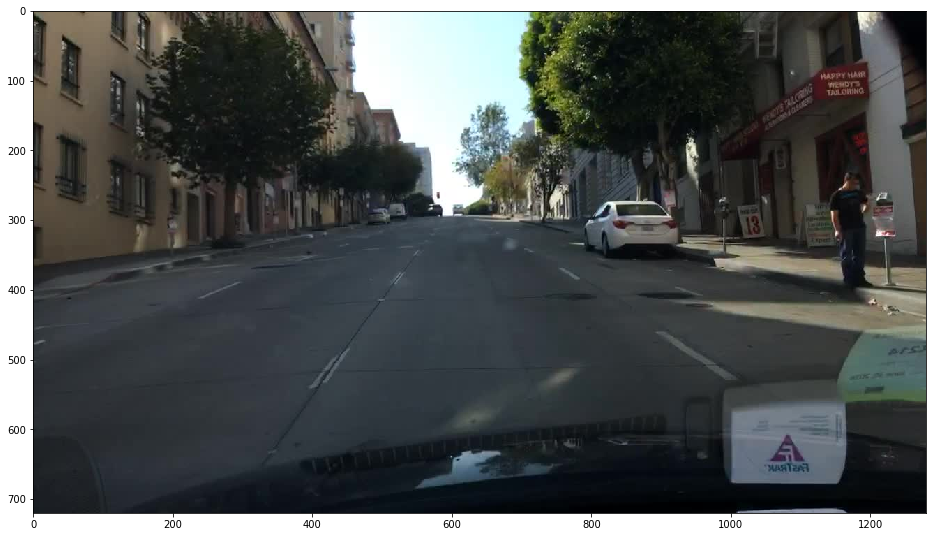

In [10]:
index = randint(0, len(contents)-1)
print(index)
content = contents[index]
path = content[0]
name = get_file_name(path)
print(path, name)

img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(img))
plt.show()

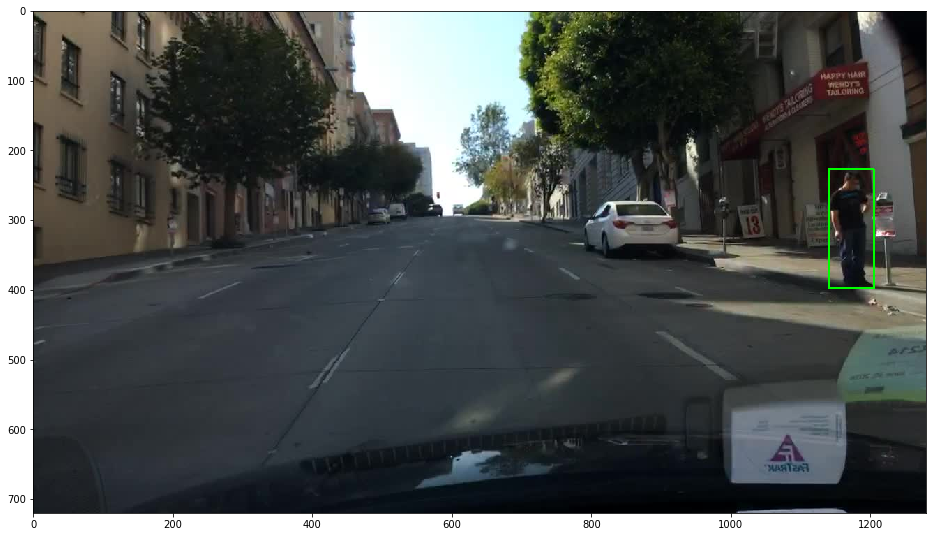

In [11]:
xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()

for box in person_boxes:
    if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)

    else:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 0), -1)
        
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(dummy))
plt.show()

In [150]:
# cv2.imwrite(f"./yolo-various-size/60-70-enhanced/{name}_outliers_removed.jpg ", dummy)

True

In [12]:
# RUN ====================

obj_count=0
i=0

for content in contents:
    path = content[0]
    name = get_file_name(path)

    img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")

    xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

    person_boxes = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append(["person", left, top, right, bottom])

    dummy = img.copy()

    for box in person_boxes:
        if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
            obj_count+=1

        else:
            cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 0), -1)
#     cv2.imwrite(f"./yolo-various-size/60-70-enhanced/img_train/{name}_outliers_removed.jpg ", dummy)
    i+=1
    print(i, f"/ {len(contents)}")

1 / 1762
2 / 1762
3 / 1762
4 / 1762
5 / 1762
6 / 1762
7 / 1762
8 / 1762
9 / 1762
10 / 1762
11 / 1762
12 / 1762
13 / 1762
14 / 1762
15 / 1762
16 / 1762
17 / 1762
18 / 1762
19 / 1762
20 / 1762
21 / 1762
22 / 1762
23 / 1762
24 / 1762
25 / 1762
26 / 1762
27 / 1762
28 / 1762
29 / 1762
30 / 1762
31 / 1762
32 / 1762
33 / 1762
34 / 1762
35 / 1762
36 / 1762
37 / 1762
38 / 1762
39 / 1762
40 / 1762
41 / 1762
42 / 1762
43 / 1762
44 / 1762
45 / 1762
46 / 1762
47 / 1762
48 / 1762
49 / 1762
50 / 1762
51 / 1762
52 / 1762
53 / 1762
54 / 1762
55 / 1762
56 / 1762
57 / 1762
58 / 1762
59 / 1762
60 / 1762
61 / 1762
62 / 1762
63 / 1762
64 / 1762
65 / 1762
66 / 1762
67 / 1762
68 / 1762
69 / 1762
70 / 1762
71 / 1762
72 / 1762
73 / 1762
74 / 1762
75 / 1762
76 / 1762
77 / 1762
78 / 1762
79 / 1762
80 / 1762
81 / 1762
82 / 1762
83 / 1762
84 / 1762
85 / 1762
86 / 1762
87 / 1762
88 / 1762
89 / 1762
90 / 1762
91 / 1762
92 / 1762
93 / 1762
94 / 1762
95 / 1762
96 / 1762
97 / 1762
98 / 1762
99 / 1762
100 / 1762
101 / 17

KeyboardInterrupt: 

In [152]:
print(obj_count)

6250


# Gen TXT GT (ignore 25% top)

In [5]:
# Generate Validation Annotations TXT 
xml_src = glob.glob("../datasets/bdd100k/xml/val/*.xml")

i=0
for xml_path in xml_src:
    i+=1
    person_boxes = []
    small_widths = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append([left, top, right, bottom])
                
#                 if int(bottom) >= 0:
#                     small_widths.append(int(bottom))

#     if len(person_boxes) > 0 and len(small_widths) > 0:
    if len(person_boxes) > 0:
        img_basename = os.path.basename(xml_path)
        img_onlyname = os.path.splitext(img_basename)
        
        # Create and write out a text file:
        text_file = open("./bdd100k_person_GT/" + img_onlyname[0] + ".txt", "w+")

        for box in person_boxes:
#             if int(bottom) >= 180:
            print("person", box[0], box[1], box[2], box[3], file=text_file)                     
        text_file.close()
        
    print(i, "/ 10000")

1 / 10000
2 / 10000
3 / 10000
4 / 10000
5 / 10000
6 / 10000
7 / 10000
8 / 10000
9 / 10000
10 / 10000
11 / 10000
12 / 10000
13 / 10000
14 / 10000
15 / 10000
16 / 10000
17 / 10000
18 / 10000
19 / 10000
20 / 10000
21 / 10000
22 / 10000
23 / 10000
24 / 10000
25 / 10000
26 / 10000
27 / 10000
28 / 10000
29 / 10000
30 / 10000
31 / 10000
32 / 10000
33 / 10000
34 / 10000
35 / 10000
36 / 10000
37 / 10000
38 / 10000
39 / 10000
40 / 10000
41 / 10000
42 / 10000
43 / 10000
44 / 10000
45 / 10000
46 / 10000
47 / 10000
48 / 10000
49 / 10000
50 / 10000
51 / 10000
52 / 10000
53 / 10000
54 / 10000
55 / 10000
56 / 10000
57 / 10000
58 / 10000
59 / 10000
60 / 10000
61 / 10000
62 / 10000
63 / 10000
64 / 10000
65 / 10000
66 / 10000
67 / 10000
68 / 10000
69 / 10000
70 / 10000
71 / 10000
72 / 10000
73 / 10000
74 / 10000
75 / 10000
76 / 10000
77 / 10000
78 / 10000
79 / 10000
80 / 10000
81 / 10000
82 / 10000
83 / 10000
84 / 10000
85 / 10000
86 / 10000
87 / 10000
88 / 10000
89 / 10000
90 / 10000
91 / 10000
92 / 100

717 / 10000
718 / 10000
719 / 10000
720 / 10000
721 / 10000
722 / 10000
723 / 10000
724 / 10000
725 / 10000
726 / 10000
727 / 10000
728 / 10000
729 / 10000
730 / 10000
731 / 10000
732 / 10000
733 / 10000
734 / 10000
735 / 10000
736 / 10000
737 / 10000
738 / 10000
739 / 10000
740 / 10000
741 / 10000
742 / 10000
743 / 10000
744 / 10000
745 / 10000
746 / 10000
747 / 10000
748 / 10000
749 / 10000
750 / 10000
751 / 10000
752 / 10000
753 / 10000
754 / 10000
755 / 10000
756 / 10000
757 / 10000
758 / 10000
759 / 10000
760 / 10000
761 / 10000
762 / 10000
763 / 10000
764 / 10000
765 / 10000
766 / 10000
767 / 10000
768 / 10000
769 / 10000
770 / 10000
771 / 10000
772 / 10000
773 / 10000
774 / 10000
775 / 10000
776 / 10000
777 / 10000
778 / 10000
779 / 10000
780 / 10000
781 / 10000
782 / 10000
783 / 10000
784 / 10000
785 / 10000
786 / 10000
787 / 10000
788 / 10000
789 / 10000
790 / 10000
791 / 10000
792 / 10000
793 / 10000
794 / 10000
795 / 10000
796 / 10000
797 / 10000
798 / 10000
799 / 10000
800 

1394 / 10000
1395 / 10000
1396 / 10000
1397 / 10000
1398 / 10000
1399 / 10000
1400 / 10000
1401 / 10000
1402 / 10000
1403 / 10000
1404 / 10000
1405 / 10000
1406 / 10000
1407 / 10000
1408 / 10000
1409 / 10000
1410 / 10000
1411 / 10000
1412 / 10000
1413 / 10000
1414 / 10000
1415 / 10000
1416 / 10000
1417 / 10000
1418 / 10000
1419 / 10000
1420 / 10000
1421 / 10000
1422 / 10000
1423 / 10000
1424 / 10000
1425 / 10000
1426 / 10000
1427 / 10000
1428 / 10000
1429 / 10000
1430 / 10000
1431 / 10000
1432 / 10000
1433 / 10000
1434 / 10000
1435 / 10000
1436 / 10000
1437 / 10000
1438 / 10000
1439 / 10000
1440 / 10000
1441 / 10000
1442 / 10000
1443 / 10000
1444 / 10000
1445 / 10000
1446 / 10000
1447 / 10000
1448 / 10000
1449 / 10000
1450 / 10000
1451 / 10000
1452 / 10000
1453 / 10000
1454 / 10000
1455 / 10000
1456 / 10000
1457 / 10000
1458 / 10000
1459 / 10000
1460 / 10000
1461 / 10000
1462 / 10000
1463 / 10000
1464 / 10000
1465 / 10000
1466 / 10000
1467 / 10000
1468 / 10000
1469 / 10000
1470 / 10000

2027 / 10000
2028 / 10000
2029 / 10000
2030 / 10000
2031 / 10000
2032 / 10000
2033 / 10000
2034 / 10000
2035 / 10000
2036 / 10000
2037 / 10000
2038 / 10000
2039 / 10000
2040 / 10000
2041 / 10000
2042 / 10000
2043 / 10000
2044 / 10000
2045 / 10000
2046 / 10000
2047 / 10000
2048 / 10000
2049 / 10000
2050 / 10000
2051 / 10000
2052 / 10000
2053 / 10000
2054 / 10000
2055 / 10000
2056 / 10000
2057 / 10000
2058 / 10000
2059 / 10000
2060 / 10000
2061 / 10000
2062 / 10000
2063 / 10000
2064 / 10000
2065 / 10000
2066 / 10000
2067 / 10000
2068 / 10000
2069 / 10000
2070 / 10000
2071 / 10000
2072 / 10000
2073 / 10000
2074 / 10000
2075 / 10000
2076 / 10000
2077 / 10000
2078 / 10000
2079 / 10000
2080 / 10000
2081 / 10000
2082 / 10000
2083 / 10000
2084 / 10000
2085 / 10000
2086 / 10000
2087 / 10000
2088 / 10000
2089 / 10000
2090 / 10000
2091 / 10000
2092 / 10000
2093 / 10000
2094 / 10000
2095 / 10000
2096 / 10000
2097 / 10000
2098 / 10000
2099 / 10000
2100 / 10000
2101 / 10000
2102 / 10000
2103 / 10000

2668 / 10000
2669 / 10000
2670 / 10000
2671 / 10000
2672 / 10000
2673 / 10000
2674 / 10000
2675 / 10000
2676 / 10000
2677 / 10000
2678 / 10000
2679 / 10000
2680 / 10000
2681 / 10000
2682 / 10000
2683 / 10000
2684 / 10000
2685 / 10000
2686 / 10000
2687 / 10000
2688 / 10000
2689 / 10000
2690 / 10000
2691 / 10000
2692 / 10000
2693 / 10000
2694 / 10000
2695 / 10000
2696 / 10000
2697 / 10000
2698 / 10000
2699 / 10000
2700 / 10000
2701 / 10000
2702 / 10000
2703 / 10000
2704 / 10000
2705 / 10000
2706 / 10000
2707 / 10000
2708 / 10000
2709 / 10000
2710 / 10000
2711 / 10000
2712 / 10000
2713 / 10000
2714 / 10000
2715 / 10000
2716 / 10000
2717 / 10000
2718 / 10000
2719 / 10000
2720 / 10000
2721 / 10000
2722 / 10000
2723 / 10000
2724 / 10000
2725 / 10000
2726 / 10000
2727 / 10000
2728 / 10000
2729 / 10000
2730 / 10000
2731 / 10000
2732 / 10000
2733 / 10000
2734 / 10000
2735 / 10000
2736 / 10000
2737 / 10000
2738 / 10000
2739 / 10000
2740 / 10000
2741 / 10000
2742 / 10000
2743 / 10000
2744 / 10000

3300 / 10000
3301 / 10000
3302 / 10000
3303 / 10000
3304 / 10000
3305 / 10000
3306 / 10000
3307 / 10000
3308 / 10000
3309 / 10000
3310 / 10000
3311 / 10000
3312 / 10000
3313 / 10000
3314 / 10000
3315 / 10000
3316 / 10000
3317 / 10000
3318 / 10000
3319 / 10000
3320 / 10000
3321 / 10000
3322 / 10000
3323 / 10000
3324 / 10000
3325 / 10000
3326 / 10000
3327 / 10000
3328 / 10000
3329 / 10000
3330 / 10000
3331 / 10000
3332 / 10000
3333 / 10000
3334 / 10000
3335 / 10000
3336 / 10000
3337 / 10000
3338 / 10000
3339 / 10000
3340 / 10000
3341 / 10000
3342 / 10000
3343 / 10000
3344 / 10000
3345 / 10000
3346 / 10000
3347 / 10000
3348 / 10000
3349 / 10000
3350 / 10000
3351 / 10000
3352 / 10000
3353 / 10000
3354 / 10000
3355 / 10000
3356 / 10000
3357 / 10000
3358 / 10000
3359 / 10000
3360 / 10000
3361 / 10000
3362 / 10000
3363 / 10000
3364 / 10000
3365 / 10000
3366 / 10000
3367 / 10000
3368 / 10000
3369 / 10000
3370 / 10000
3371 / 10000
3372 / 10000
3373 / 10000
3374 / 10000
3375 / 10000
3376 / 10000

3941 / 10000
3942 / 10000
3943 / 10000
3944 / 10000
3945 / 10000
3946 / 10000
3947 / 10000
3948 / 10000
3949 / 10000
3950 / 10000
3951 / 10000
3952 / 10000
3953 / 10000
3954 / 10000
3955 / 10000
3956 / 10000
3957 / 10000
3958 / 10000
3959 / 10000
3960 / 10000
3961 / 10000
3962 / 10000
3963 / 10000
3964 / 10000
3965 / 10000
3966 / 10000
3967 / 10000
3968 / 10000
3969 / 10000
3970 / 10000
3971 / 10000
3972 / 10000
3973 / 10000
3974 / 10000
3975 / 10000
3976 / 10000
3977 / 10000
3978 / 10000
3979 / 10000
3980 / 10000
3981 / 10000
3982 / 10000
3983 / 10000
3984 / 10000
3985 / 10000
3986 / 10000
3987 / 10000
3988 / 10000
3989 / 10000
3990 / 10000
3991 / 10000
3992 / 10000
3993 / 10000
3994 / 10000
3995 / 10000
3996 / 10000
3997 / 10000
3998 / 10000
3999 / 10000
4000 / 10000
4001 / 10000
4002 / 10000
4003 / 10000
4004 / 10000
4005 / 10000
4006 / 10000
4007 / 10000
4008 / 10000
4009 / 10000
4010 / 10000
4011 / 10000
4012 / 10000
4013 / 10000
4014 / 10000
4015 / 10000
4016 / 10000
4017 / 10000

4574 / 10000
4575 / 10000
4576 / 10000
4577 / 10000
4578 / 10000
4579 / 10000
4580 / 10000
4581 / 10000
4582 / 10000
4583 / 10000
4584 / 10000
4585 / 10000
4586 / 10000
4587 / 10000
4588 / 10000
4589 / 10000
4590 / 10000
4591 / 10000
4592 / 10000
4593 / 10000
4594 / 10000
4595 / 10000
4596 / 10000
4597 / 10000
4598 / 10000
4599 / 10000
4600 / 10000
4601 / 10000
4602 / 10000
4603 / 10000
4604 / 10000
4605 / 10000
4606 / 10000
4607 / 10000
4608 / 10000
4609 / 10000
4610 / 10000
4611 / 10000
4612 / 10000
4613 / 10000
4614 / 10000
4615 / 10000
4616 / 10000
4617 / 10000
4618 / 10000
4619 / 10000
4620 / 10000
4621 / 10000
4622 / 10000
4623 / 10000
4624 / 10000
4625 / 10000
4626 / 10000
4627 / 10000
4628 / 10000
4629 / 10000
4630 / 10000
4631 / 10000
4632 / 10000
4633 / 10000
4634 / 10000
4635 / 10000
4636 / 10000
4637 / 10000
4638 / 10000
4639 / 10000
4640 / 10000
4641 / 10000
4642 / 10000
4643 / 10000
4644 / 10000
4645 / 10000
4646 / 10000
4647 / 10000
4648 / 10000
4649 / 10000
4650 / 10000

5231 / 10000
5232 / 10000
5233 / 10000
5234 / 10000
5235 / 10000
5236 / 10000
5237 / 10000
5238 / 10000
5239 / 10000
5240 / 10000
5241 / 10000
5242 / 10000
5243 / 10000
5244 / 10000
5245 / 10000
5246 / 10000
5247 / 10000
5248 / 10000
5249 / 10000
5250 / 10000
5251 / 10000
5252 / 10000
5253 / 10000
5254 / 10000
5255 / 10000
5256 / 10000
5257 / 10000
5258 / 10000
5259 / 10000
5260 / 10000
5261 / 10000
5262 / 10000
5263 / 10000
5264 / 10000
5265 / 10000
5266 / 10000
5267 / 10000
5268 / 10000
5269 / 10000
5270 / 10000
5271 / 10000
5272 / 10000
5273 / 10000
5274 / 10000
5275 / 10000
5276 / 10000
5277 / 10000
5278 / 10000
5279 / 10000
5280 / 10000
5281 / 10000
5282 / 10000
5283 / 10000
5284 / 10000
5285 / 10000
5286 / 10000
5287 / 10000
5288 / 10000
5289 / 10000
5290 / 10000
5291 / 10000
5292 / 10000
5293 / 10000
5294 / 10000
5295 / 10000
5296 / 10000
5297 / 10000
5298 / 10000
5299 / 10000
5300 / 10000
5301 / 10000
5302 / 10000
5303 / 10000
5304 / 10000
5305 / 10000
5306 / 10000
5307 / 10000

5872 / 10000
5873 / 10000
5874 / 10000
5875 / 10000
5876 / 10000
5877 / 10000
5878 / 10000
5879 / 10000
5880 / 10000
5881 / 10000
5882 / 10000
5883 / 10000
5884 / 10000
5885 / 10000
5886 / 10000
5887 / 10000
5888 / 10000
5889 / 10000
5890 / 10000
5891 / 10000
5892 / 10000
5893 / 10000
5894 / 10000
5895 / 10000
5896 / 10000
5897 / 10000
5898 / 10000
5899 / 10000
5900 / 10000
5901 / 10000
5902 / 10000
5903 / 10000
5904 / 10000
5905 / 10000
5906 / 10000
5907 / 10000
5908 / 10000
5909 / 10000
5910 / 10000
5911 / 10000
5912 / 10000
5913 / 10000
5914 / 10000
5915 / 10000
5916 / 10000
5917 / 10000
5918 / 10000
5919 / 10000
5920 / 10000
5921 / 10000
5922 / 10000
5923 / 10000
5924 / 10000
5925 / 10000
5926 / 10000
5927 / 10000
5928 / 10000
5929 / 10000
5930 / 10000
5931 / 10000
5932 / 10000
5933 / 10000
5934 / 10000
5935 / 10000
5936 / 10000
5937 / 10000
5938 / 10000
5939 / 10000
5940 / 10000
5941 / 10000
5942 / 10000
5943 / 10000
5944 / 10000
5945 / 10000
5946 / 10000
5947 / 10000
5948 / 10000

6513 / 10000
6514 / 10000
6515 / 10000
6516 / 10000
6517 / 10000
6518 / 10000
6519 / 10000
6520 / 10000
6521 / 10000
6522 / 10000
6523 / 10000
6524 / 10000
6525 / 10000
6526 / 10000
6527 / 10000
6528 / 10000
6529 / 10000
6530 / 10000
6531 / 10000
6532 / 10000
6533 / 10000
6534 / 10000
6535 / 10000
6536 / 10000
6537 / 10000
6538 / 10000
6539 / 10000
6540 / 10000
6541 / 10000
6542 / 10000
6543 / 10000
6544 / 10000
6545 / 10000
6546 / 10000
6547 / 10000
6548 / 10000
6549 / 10000
6550 / 10000
6551 / 10000
6552 / 10000
6553 / 10000
6554 / 10000
6555 / 10000
6556 / 10000
6557 / 10000
6558 / 10000
6559 / 10000
6560 / 10000
6561 / 10000
6562 / 10000
6563 / 10000
6564 / 10000
6565 / 10000
6566 / 10000
6567 / 10000
6568 / 10000
6569 / 10000
6570 / 10000
6571 / 10000
6572 / 10000
6573 / 10000
6574 / 10000
6575 / 10000
6576 / 10000
6577 / 10000
6578 / 10000
6579 / 10000
6580 / 10000
6581 / 10000
6582 / 10000
6583 / 10000
6584 / 10000
6585 / 10000
6586 / 10000
6587 / 10000
6588 / 10000
6589 / 10000

7147 / 10000
7148 / 10000
7149 / 10000
7150 / 10000
7151 / 10000
7152 / 10000
7153 / 10000
7154 / 10000
7155 / 10000
7156 / 10000
7157 / 10000
7158 / 10000
7159 / 10000
7160 / 10000
7161 / 10000
7162 / 10000
7163 / 10000
7164 / 10000
7165 / 10000
7166 / 10000
7167 / 10000
7168 / 10000
7169 / 10000
7170 / 10000
7171 / 10000
7172 / 10000
7173 / 10000
7174 / 10000
7175 / 10000
7176 / 10000
7177 / 10000
7178 / 10000
7179 / 10000
7180 / 10000
7181 / 10000
7182 / 10000
7183 / 10000
7184 / 10000
7185 / 10000
7186 / 10000
7187 / 10000
7188 / 10000
7189 / 10000
7190 / 10000
7191 / 10000
7192 / 10000
7193 / 10000
7194 / 10000
7195 / 10000
7196 / 10000
7197 / 10000
7198 / 10000
7199 / 10000
7200 / 10000
7201 / 10000
7202 / 10000
7203 / 10000
7204 / 10000
7205 / 10000
7206 / 10000
7207 / 10000
7208 / 10000
7209 / 10000
7210 / 10000
7211 / 10000
7212 / 10000
7213 / 10000
7214 / 10000
7215 / 10000
7216 / 10000
7217 / 10000
7218 / 10000
7219 / 10000
7220 / 10000
7221 / 10000
7222 / 10000
7223 / 10000

7801 / 10000
7802 / 10000
7803 / 10000
7804 / 10000
7805 / 10000
7806 / 10000
7807 / 10000
7808 / 10000
7809 / 10000
7810 / 10000
7811 / 10000
7812 / 10000
7813 / 10000
7814 / 10000
7815 / 10000
7816 / 10000
7817 / 10000
7818 / 10000
7819 / 10000
7820 / 10000
7821 / 10000
7822 / 10000
7823 / 10000
7824 / 10000
7825 / 10000
7826 / 10000
7827 / 10000
7828 / 10000
7829 / 10000
7830 / 10000
7831 / 10000
7832 / 10000
7833 / 10000
7834 / 10000
7835 / 10000
7836 / 10000
7837 / 10000
7838 / 10000
7839 / 10000
7840 / 10000
7841 / 10000
7842 / 10000
7843 / 10000
7844 / 10000
7845 / 10000
7846 / 10000
7847 / 10000
7848 / 10000
7849 / 10000
7850 / 10000
7851 / 10000
7852 / 10000
7853 / 10000
7854 / 10000
7855 / 10000
7856 / 10000
7857 / 10000
7858 / 10000
7859 / 10000
7860 / 10000
7861 / 10000
7862 / 10000
7863 / 10000
7864 / 10000
7865 / 10000
7866 / 10000
7867 / 10000
7868 / 10000
7869 / 10000
7870 / 10000
7871 / 10000
7872 / 10000
7873 / 10000
7874 / 10000
7875 / 10000
7876 / 10000
7877 / 10000

8435 / 10000
8436 / 10000
8437 / 10000
8438 / 10000
8439 / 10000
8440 / 10000
8441 / 10000
8442 / 10000
8443 / 10000
8444 / 10000
8445 / 10000
8446 / 10000
8447 / 10000
8448 / 10000
8449 / 10000
8450 / 10000
8451 / 10000
8452 / 10000
8453 / 10000
8454 / 10000
8455 / 10000
8456 / 10000
8457 / 10000
8458 / 10000
8459 / 10000
8460 / 10000
8461 / 10000
8462 / 10000
8463 / 10000
8464 / 10000
8465 / 10000
8466 / 10000
8467 / 10000
8468 / 10000
8469 / 10000
8470 / 10000
8471 / 10000
8472 / 10000
8473 / 10000
8474 / 10000
8475 / 10000
8476 / 10000
8477 / 10000
8478 / 10000
8479 / 10000
8480 / 10000
8481 / 10000
8482 / 10000
8483 / 10000
8484 / 10000
8485 / 10000
8486 / 10000
8487 / 10000
8488 / 10000
8489 / 10000
8490 / 10000
8491 / 10000
8492 / 10000
8493 / 10000
8494 / 10000
8495 / 10000
8496 / 10000
8497 / 10000
8498 / 10000
8499 / 10000
8500 / 10000
8501 / 10000
8502 / 10000
8503 / 10000
8504 / 10000
8505 / 10000
8506 / 10000
8507 / 10000
8508 / 10000
8509 / 10000
8510 / 10000
8511 / 10000

9080 / 10000
9081 / 10000
9082 / 10000
9083 / 10000
9084 / 10000
9085 / 10000
9086 / 10000
9087 / 10000
9088 / 10000
9089 / 10000
9090 / 10000
9091 / 10000
9092 / 10000
9093 / 10000
9094 / 10000
9095 / 10000
9096 / 10000
9097 / 10000
9098 / 10000
9099 / 10000
9100 / 10000
9101 / 10000
9102 / 10000
9103 / 10000
9104 / 10000
9105 / 10000
9106 / 10000
9107 / 10000
9108 / 10000
9109 / 10000
9110 / 10000
9111 / 10000
9112 / 10000
9113 / 10000
9114 / 10000
9115 / 10000
9116 / 10000
9117 / 10000
9118 / 10000
9119 / 10000
9120 / 10000
9121 / 10000
9122 / 10000
9123 / 10000
9124 / 10000
9125 / 10000
9126 / 10000
9127 / 10000
9128 / 10000
9129 / 10000
9130 / 10000
9131 / 10000
9132 / 10000
9133 / 10000
9134 / 10000
9135 / 10000
9136 / 10000
9137 / 10000
9138 / 10000
9139 / 10000
9140 / 10000
9141 / 10000
9142 / 10000
9143 / 10000
9144 / 10000
9145 / 10000
9146 / 10000
9147 / 10000
9148 / 10000
9149 / 10000
9150 / 10000
9151 / 10000
9152 / 10000
9153 / 10000
9154 / 10000
9155 / 10000
9156 / 10000

9716 / 10000
9717 / 10000
9718 / 10000
9719 / 10000
9720 / 10000
9721 / 10000
9722 / 10000
9723 / 10000
9724 / 10000
9725 / 10000
9726 / 10000
9727 / 10000
9728 / 10000
9729 / 10000
9730 / 10000
9731 / 10000
9732 / 10000
9733 / 10000
9734 / 10000
9735 / 10000
9736 / 10000
9737 / 10000
9738 / 10000
9739 / 10000
9740 / 10000
9741 / 10000
9742 / 10000
9743 / 10000
9744 / 10000
9745 / 10000
9746 / 10000
9747 / 10000
9748 / 10000
9749 / 10000
9750 / 10000
9751 / 10000
9752 / 10000
9753 / 10000
9754 / 10000
9755 / 10000
9756 / 10000
9757 / 10000
9758 / 10000
9759 / 10000
9760 / 10000
9761 / 10000
9762 / 10000
9763 / 10000
9764 / 10000
9765 / 10000
9766 / 10000
9767 / 10000
9768 / 10000
9769 / 10000
9770 / 10000
9771 / 10000
9772 / 10000
9773 / 10000
9774 / 10000
9775 / 10000
9776 / 10000
9777 / 10000
9778 / 10000
9779 / 10000
9780 / 10000
9781 / 10000
9782 / 10000
9783 / 10000
9784 / 10000
9785 / 10000
9786 / 10000
9787 / 10000
9788 / 10000
9789 / 10000
9790 / 10000
9791 / 10000
9792 / 10000